In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1.0 Crop Parameters

In [ ]:
aicu_crop = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/CropParameters.csv')
aicu_crop['datetime'] = pd.to_datetime(aicu_crop['%Time'], unit='D', origin='1899-12-30')
aicu_crop = aicu_crop.drop(['%Time'], axis = 1)

#Removing Preceeding blank spaces in name of columns
aicu_crop.columns = aicu_crop.columns.str.strip()

aicu_crop.head()

Stem_elong  Stem_thick  Cum_trusses  stem_dens  plant_dens   datetime
0       18.7         8.3          NaN        3.6         1.8 2019-12-24
1       29.9        11.7          1.3        3.6         1.8 2019-12-31
2       35.8        13.6          3.2        3.6         1.8 2020-01-08
3       35.1        13.5          4.7        3.6         1.8 2020-01-15
4       34.7        12.6          5.8        3.6         1.8 2020-01-22

In [ ]:
aicu_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Stem_elong   23 non-null     object        
 1   Stem_thick   18 non-null     float64       
 2   Cum_trusses  18 non-null     float64       
 3   stem_dens    23 non-null     float64       
 4   plant_dens   23 non-null     float64       
 5   datetime     23 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.2+ KB


- Stem_elong data type is object instead of float. Needs to be converted

In [ ]:
aicu_crop['Stem_elong'] = aicu_crop['Stem_elong'].astype('float')
aicu_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Stem_elong   18 non-null     float64       
 1   Stem_thick   18 non-null     float64       
 2   Cum_trusses  18 non-null     float64       
 3   stem_dens    23 non-null     float64       
 4   plant_dens   23 non-null     float64       
 5   datetime     23 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.2 KB


In [ ]:
aicu_crop.isna().sum()

Stem_elong     5
Stem_thick     5
Cum_trusses    5
stem_dens      0
plant_dens     0
datetime       0
dtype: int64

- MIssing Values in 3 columns

In [ ]:
aicu_crop = aicu_crop.set_index('datetime')

## 1.1 EDA

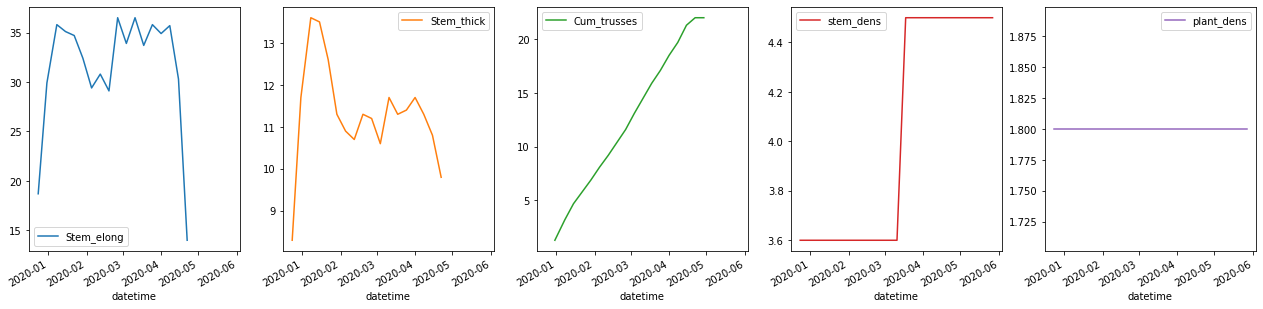

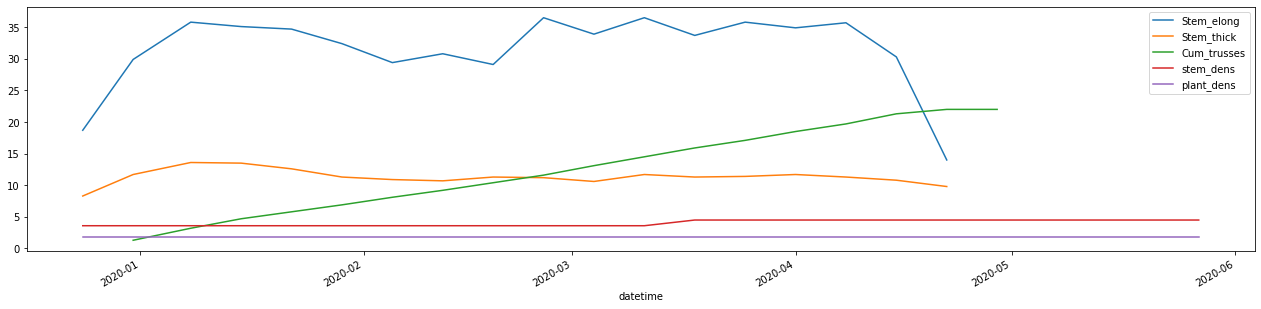

In [ ]:
aicu_crop.plot(figsize = (22, 5), subplots=True, layout=(1, 5), );
aicu_crop.plot(figsize = (22, 5), );

In [ ]:
#sns.pairplot(aicu_crop, hue = 'stem_dens', palette = 'vlag');

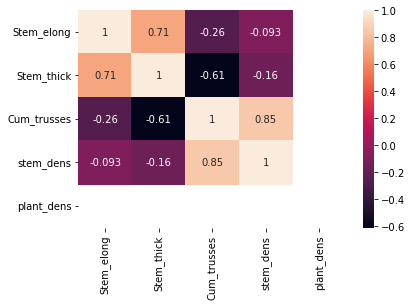

In [ ]:
sns.heatmap(aicu_crop.corr(), annot = True)

- Stem thickness increases considerably when the stem elongation increases.
- No. of trusses go on reducing if stem thickness increases

# 2.0 Greenhouse Climate

In [14]:
aicu_climate = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/GreenhouseClimate.csv')
aicu_climate['datetime'] = pd.to_datetime(aicu_climate['%time'], unit='D', origin='1899-12-30')
aicu_climate = aicu_climate.drop(['%time'], axis = 1)

aicu_climate.head()

AssimLight BlackScr CO2air Cum_irr EC_drain_PC EnScr HumDef PipeGrow  \
0        100       35    509    31.6         0.3    96    8.8      0.0   
1        100       85    484    31.8         0.3    96    9.2      0.0   
2        100       96    475    31.8         0.3    96    9.1      0.0   
3        100       96    501    32.0         0.3    96    8.5      0.0   
4        100       96    487    32.0         0.3    96    8.5      0.0   

  PipeLow Rhair  ... t_rail_min_vip t_vent_sp  t_ventlee_vip t_ventwind_vip  \
0    49.9  51.9  ...            0.0       NaN           25.0           26.0   
1    48.5  51.3  ...            0.0       NaN           25.0           26.0   
2    46.8  52.2  ...            0.0       NaN           25.0           26.0   
3    45.2  54.6  ...            0.0       NaN           25.0           26.0   
4    43.8  54.4  ...            0.0       NaN           25.0           26.0   

  water_sup water_sup_intervals_sp_min water_sup_intervals_vip_min  \
0     263.0                        NaN                          10   
1     265.0                        NaN                          10   
2     265.0                        NaN                          10   
3     267.0                        NaN                          10   
4     267.0                        NaN                          10   

  window_pos_lee_sp window_pos_lee_vip                      datetime  
0               NaN                1.2 2019-12-16 00:00:00.000000000  
1               NaN                1.2 2019-12-16 00:04:59.808000256  
2               NaN                1.2 2019-12-16 00:09:59.616000000  
3               NaN                1.2 2019-12-16 00:15:00.288000000  
4               NaN                1.2 2019-12-16 00:20:00.096000256  

[5 rows x 50 columns]

In [ ]:
aicu_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   AssimLight                   47809 non-null  object        
 1   BlackScr                     47809 non-null  object        
 2   CO2air                       47809 non-null  object        
 3   Cum_irr                      47809 non-null  object        
 4   EC_drain_PC                  47809 non-null  object        
 5   EnScr                        47809 non-null  object        
 6   HumDef                       47809 non-null  object        
 7   PipeGrow                     47809 non-null  object        
 8   PipeLow                      47809 non-null  object        
 9   Rhair                        47809 non-null  object        
 10  Tair                         47809 non-null  object        
 11  Tot_PAR                      47809 non-nu

- Data type is object instead of float for all columns except one. Needs to be converted

## 2.1 Data Pre-Processing

### 2.1.1 Changing the dtype of object columns to float

In [ ]:
columns = aicu_climate.columns

In [ ]:
obj_col_list = []
for i in range(0,aicu_climate.shape[1]):
  if aicu_climate[columns[i]].dtypes == 'O':
    obj_col_list.append(columns[i])

In [ ]:
for i in range(len(obj_col_list)):
  aicu_climate[obj_col_list[i]] = aicu_climate[obj_col_list[i]].astype('float')
aicu_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   AssimLight                   47738 non-null  float64       
 1   BlackScr                     47738 non-null  float64       
 2   CO2air                       47738 non-null  float64       
 3   Cum_irr                      47738 non-null  float64       
 4   EC_drain_PC                  47738 non-null  float64       
 5   EnScr                        47738 non-null  float64       
 6   HumDef                       47738 non-null  float64       
 7   PipeGrow                     47738 non-null  float64       
 8   PipeLow                      47738 non-null  float64       
 9   Rhair                        47738 non-null  float64       
 10  Tair                         47738 non-null  float64       
 11  Tot_PAR                      47738 non-nu

### 2.1.1 Missing Values check

In [ ]:
aicu_climate.isna().sum()

AssimLight                        71
BlackScr                          71
CO2air                            71
Cum_irr                           71
EC_drain_PC                       71
EnScr                             71
HumDef                            71
PipeGrow                          71
PipeLow                           71
Rhair                             71
Tair                              71
Tot_PAR                           71
Tot_PAR_Lamps                      0
VentLee                           71
Ventwind                          71
assim_sp                       47006
assim_vip                         71
co2_dos                            2
co2_sp                         41125
co2_vip                           71
dx_sp                          47076
dx_vip                            71
int_blue_sp                       14
int_blue_vip                   24176
int_farred_sp                     14
int_farred_vip                 24176
int_red_sp                        14
i

- 24k, 47k missing data indicates values are zero
- Some columns hav 14, 71 missing values out of ~48k values. Those rows have entire data missing and shall be dropped

In [ ]:
aicu_non_outlier_col = (aicu_climate.isna().sum()>100)[aicu_climate.isna().sum()>100].index
aicu_non_outlier_col

Index(['assim_sp', 'co2_sp', 'dx_sp', 'int_blue_vip', 'int_farred_vip',
       'int_red_vip', 'int_white_vip', 'scr_blck_sp', 'scr_enrg_sp',
       't_grow_min_sp', 't_heat_sp', 't_rail_min_sp', 't_vent_sp',
       'water_sup_intervals_sp_min', 'window_pos_lee_sp'],
      dtype='object')

In [ ]:
aicu_climate[aicu_non_outlier_col].isna().sum()

assim_sp                      47006
co2_sp                        41125
dx_sp                         47076
int_blue_vip                  24176
int_farred_vip                24176
int_red_vip                   24176
int_white_vip                 24176
scr_blck_sp                   46814
scr_enrg_sp                   46698
t_grow_min_sp                 47809
t_heat_sp                     33319
t_rail_min_sp                 47076
t_vent_sp                     27810
water_sup_intervals_sp_min    41981
window_pos_lee_sp             47004
dtype: int64

In [ ]:
#filling Null values in these columns to ZERO
for col in aicu_non_outlier_col:  
  aicu_climate[col] = aicu_climate[col].fillna(0)

In [ ]:
aicu_climate = aicu_climate.dropna()

### 2.1.3 Outlier Detection

In [ ]:
aicu_climate = aicu_climate.set_index('datetime')

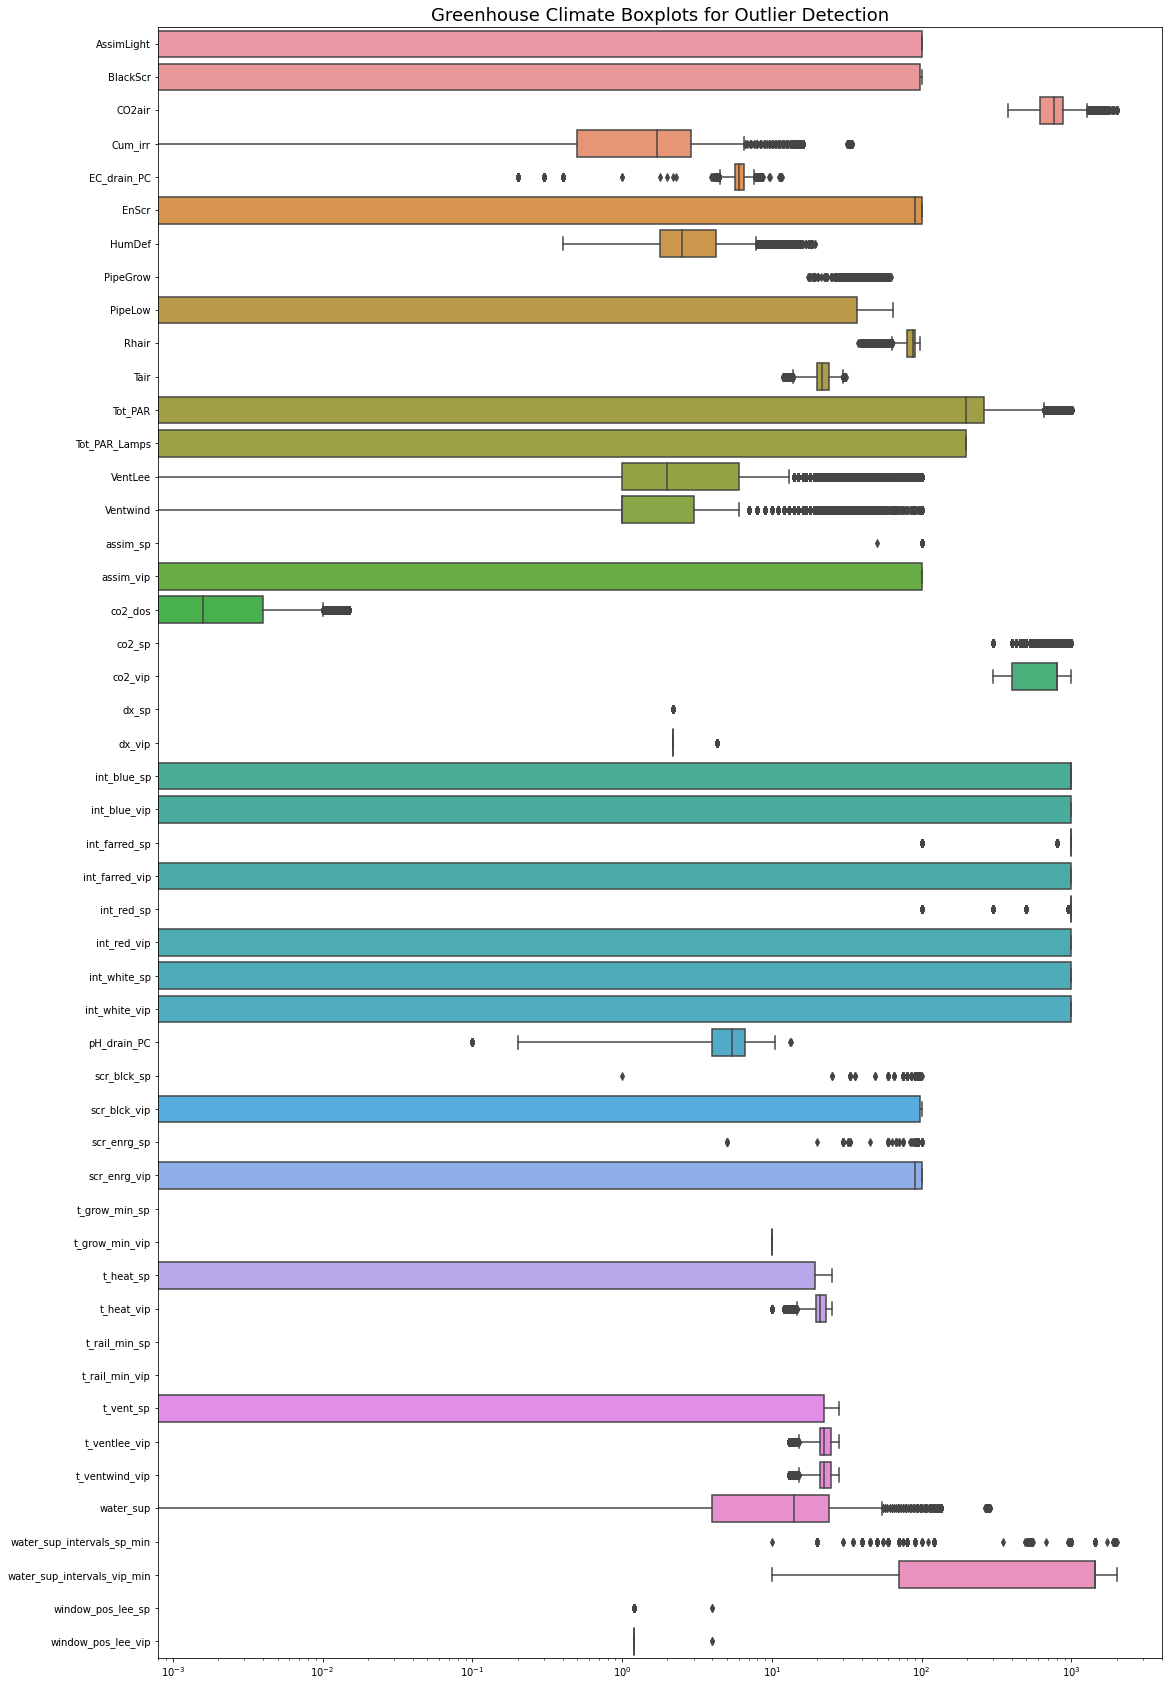

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (18,30))
ax =sns.boxplot(data = aicu_climate, orient="h")
ax.set_title('Greenhouse Climate Boxplots for Outlier Detection', fontsize = 18)
ax.set(xscale="log")
plt.show()

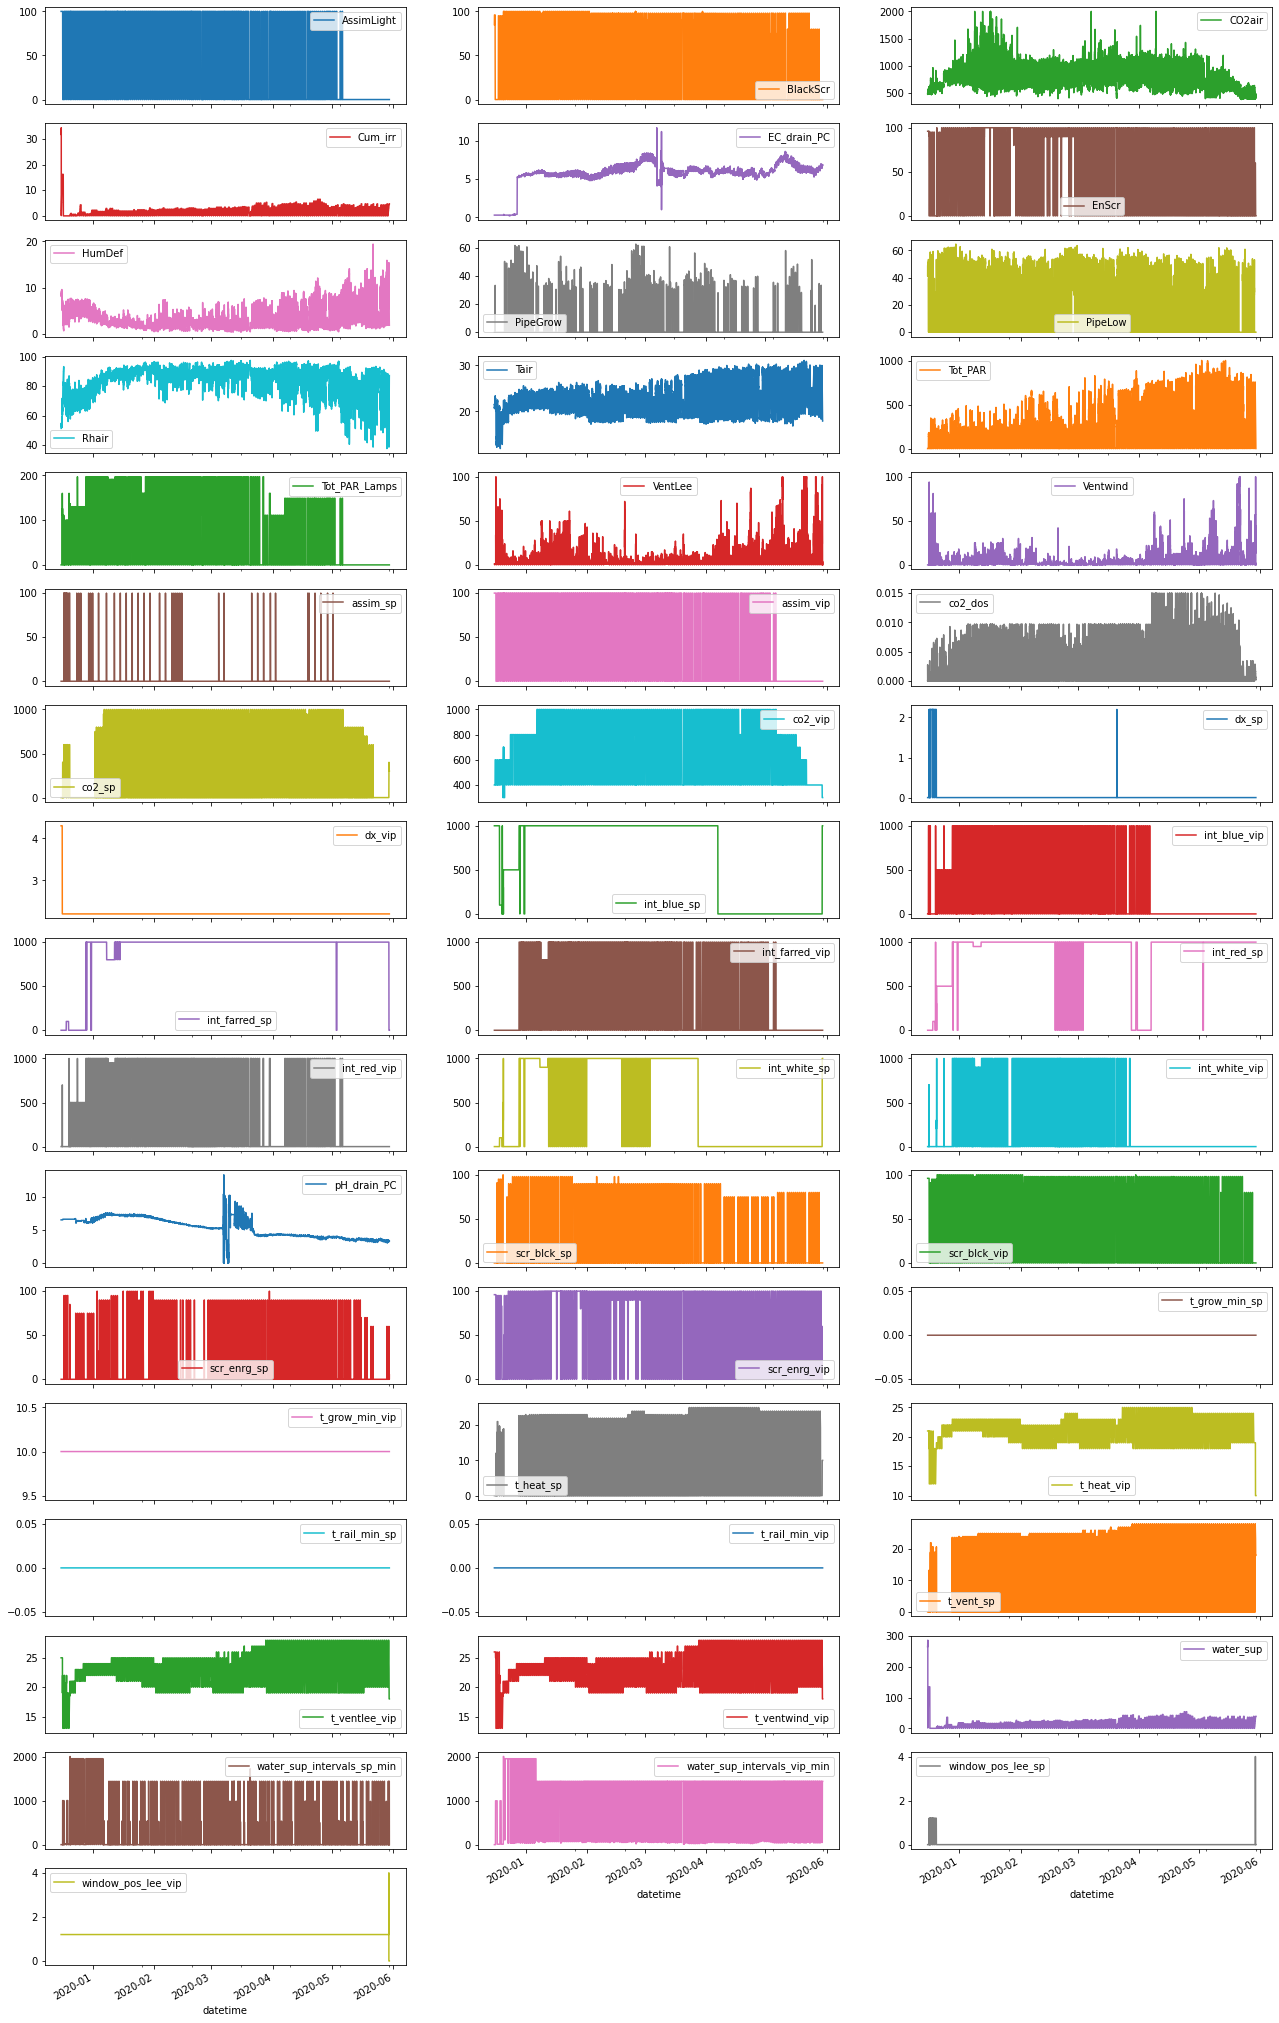

In [ ]:
aicu_climate.plot(figsize = (22, 40), subplots=True, layout=(17, 3),);

In [ ]:
X_columns = aicu_climate.columns

In [ ]:
#removing outliers from remaining columns and replacing with median i.e. 50th percentile

for col in X_columns:  
  q1, q2, q3 = np.percentile(aicu_climate[col], 25), np.percentile(aicu_climate[col], 50), np.percentile(aicu_climate[col], 75)
  IQR = q3 - q1
  upper_limit = q3 + (1.5 * IQR)
  lower_limit = q1 - (1.5 * IQR)
  aicu_climate.loc[aicu_climate[col]< lower_limit, col] = q2
  aicu_climate.loc[aicu_climate[col]> upper_limit, col] = q2  

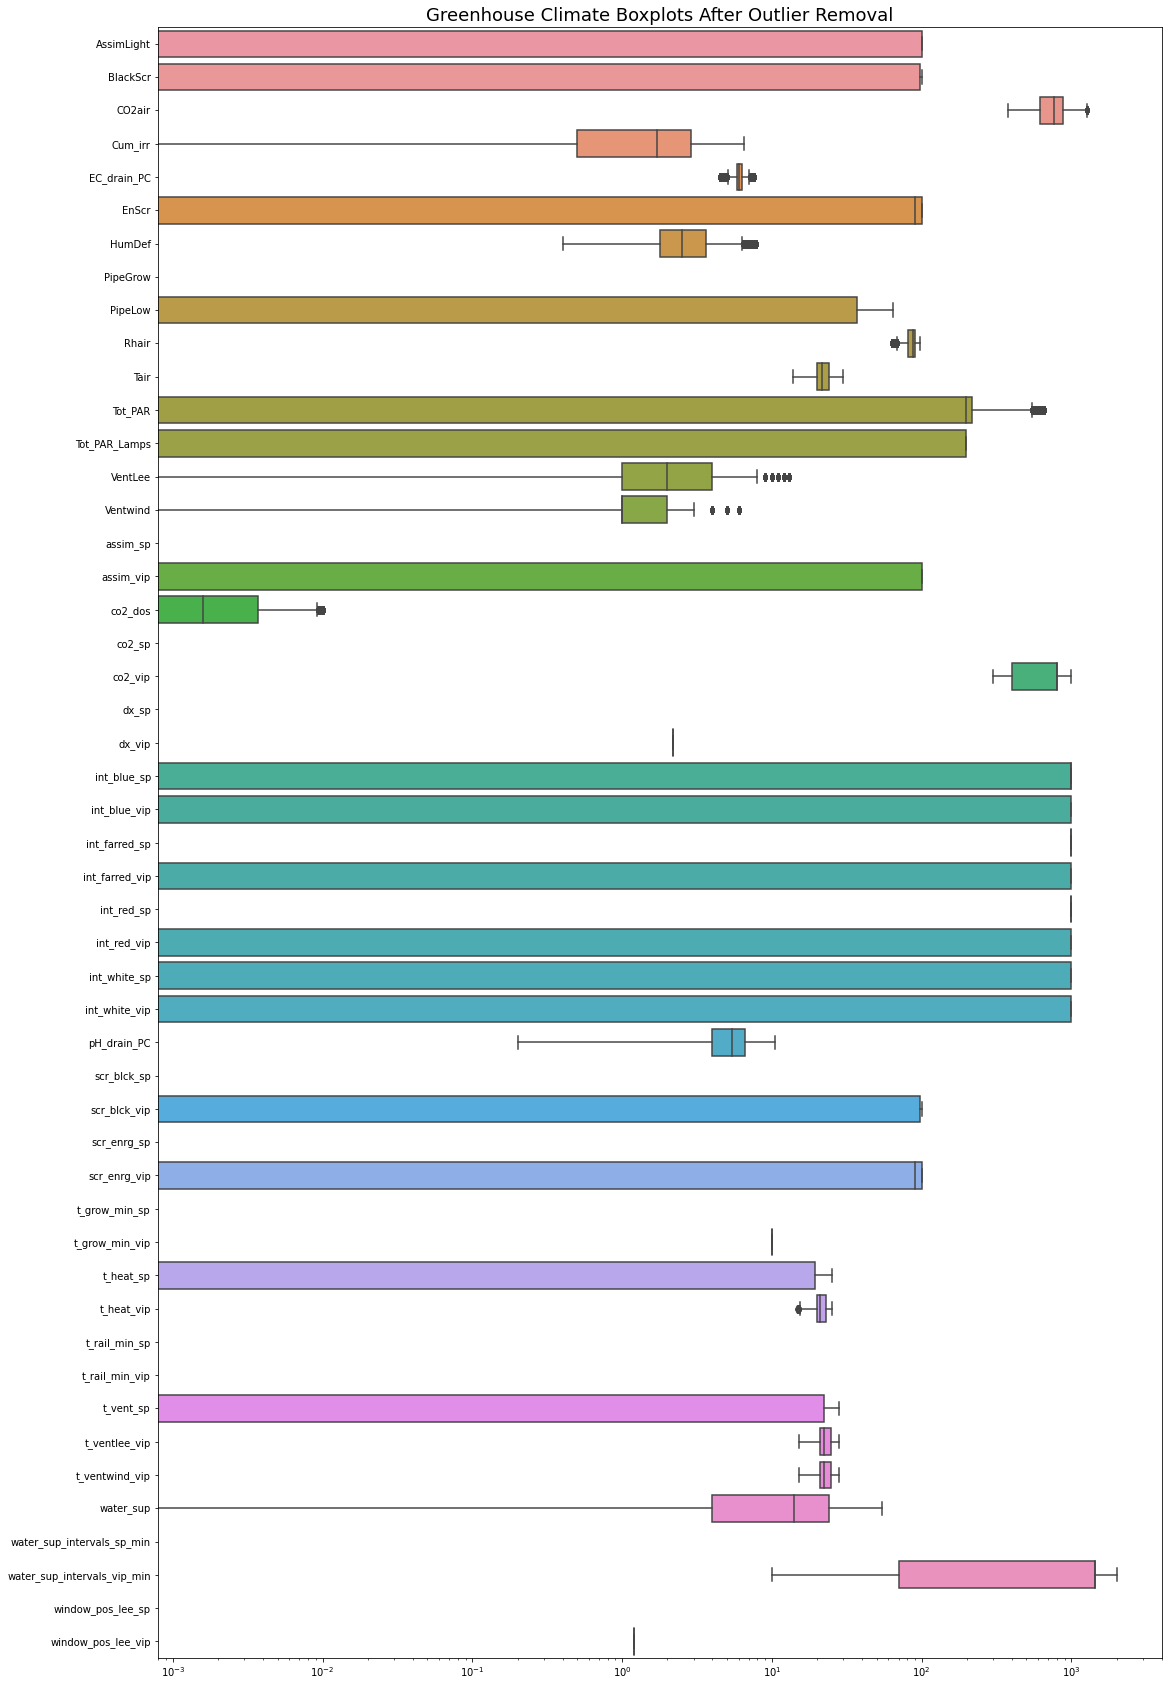

In [ ]:
# Boxplot after Outlier removal

plt.figure(figsize = (18,30))
ax =sns.boxplot(data = aicu_climate, orient="h")
ax.set_title('Greenhouse Climate Boxplots After Outlier Removal', fontsize = 18)
ax.set(xscale="log")
plt.show()

## 2.2 EDA

### 2.2.1 Indoor climate, status of actuators and irrigation

In [ ]:
aicu_indoor_climate_col = list(X_columns[:15]) 
aicu_indoor_climate_col.extend(['co2_dos', 'pH_drain_PC', 'water_sup'])


In [ ]:
aicu_indoor_climate = aicu_climate[aicu_indoor_climate_col]

In [ ]:
#sns.pairplot(aicu_indoor_climate)

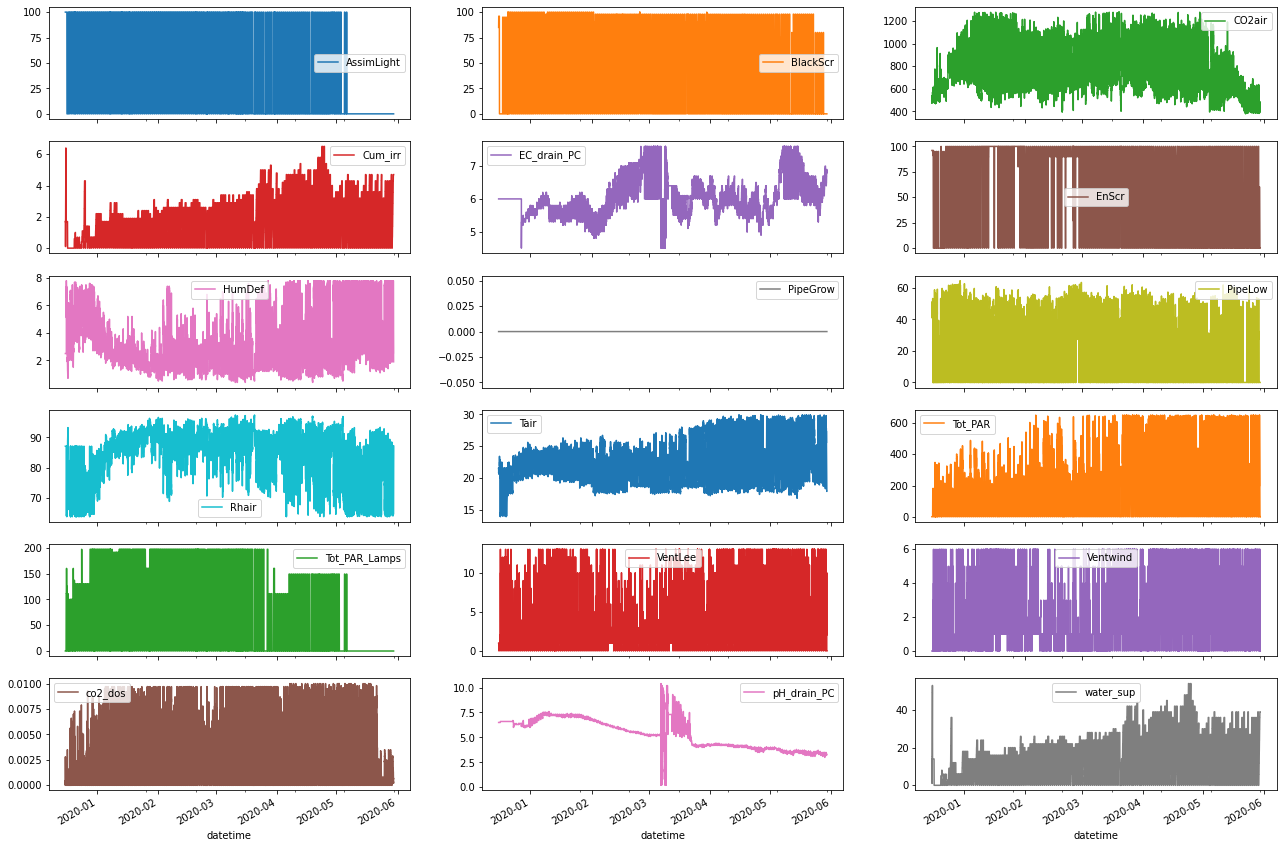

In [ ]:
aicu_indoor_climate.plot(figsize = (22, 16), subplots=True, layout=(6, 3),);

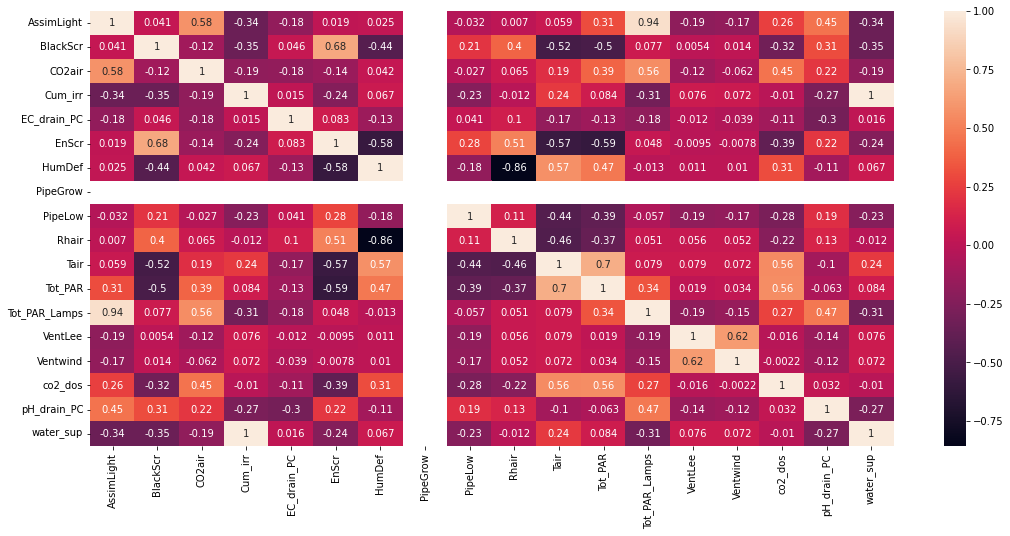

In [ ]:
plt.figure(figsize = (18,8))
sns.heatmap(aicu_indoor_climate.corr(), annot = True, );

### 2.2.2 Climate and irrigation setpoints

In [ ]:
sp_col_list = [item for item in X_columns.values if 'sp' in item]
sp_col_list

['assim_sp',
 'co2_sp',
 'dx_sp',
 'int_blue_sp',
 'int_farred_sp',
 'int_red_sp',
 'int_white_sp',
 'scr_blck_sp',
 'scr_enrg_sp',
 't_grow_min_sp',
 't_heat_sp',
 't_rail_min_sp',
 't_vent_sp',
 'water_sup_intervals_sp_min',
 'window_pos_lee_sp']

In [ ]:
aicu_climate_sp = aicu_climate[sp_col_list]

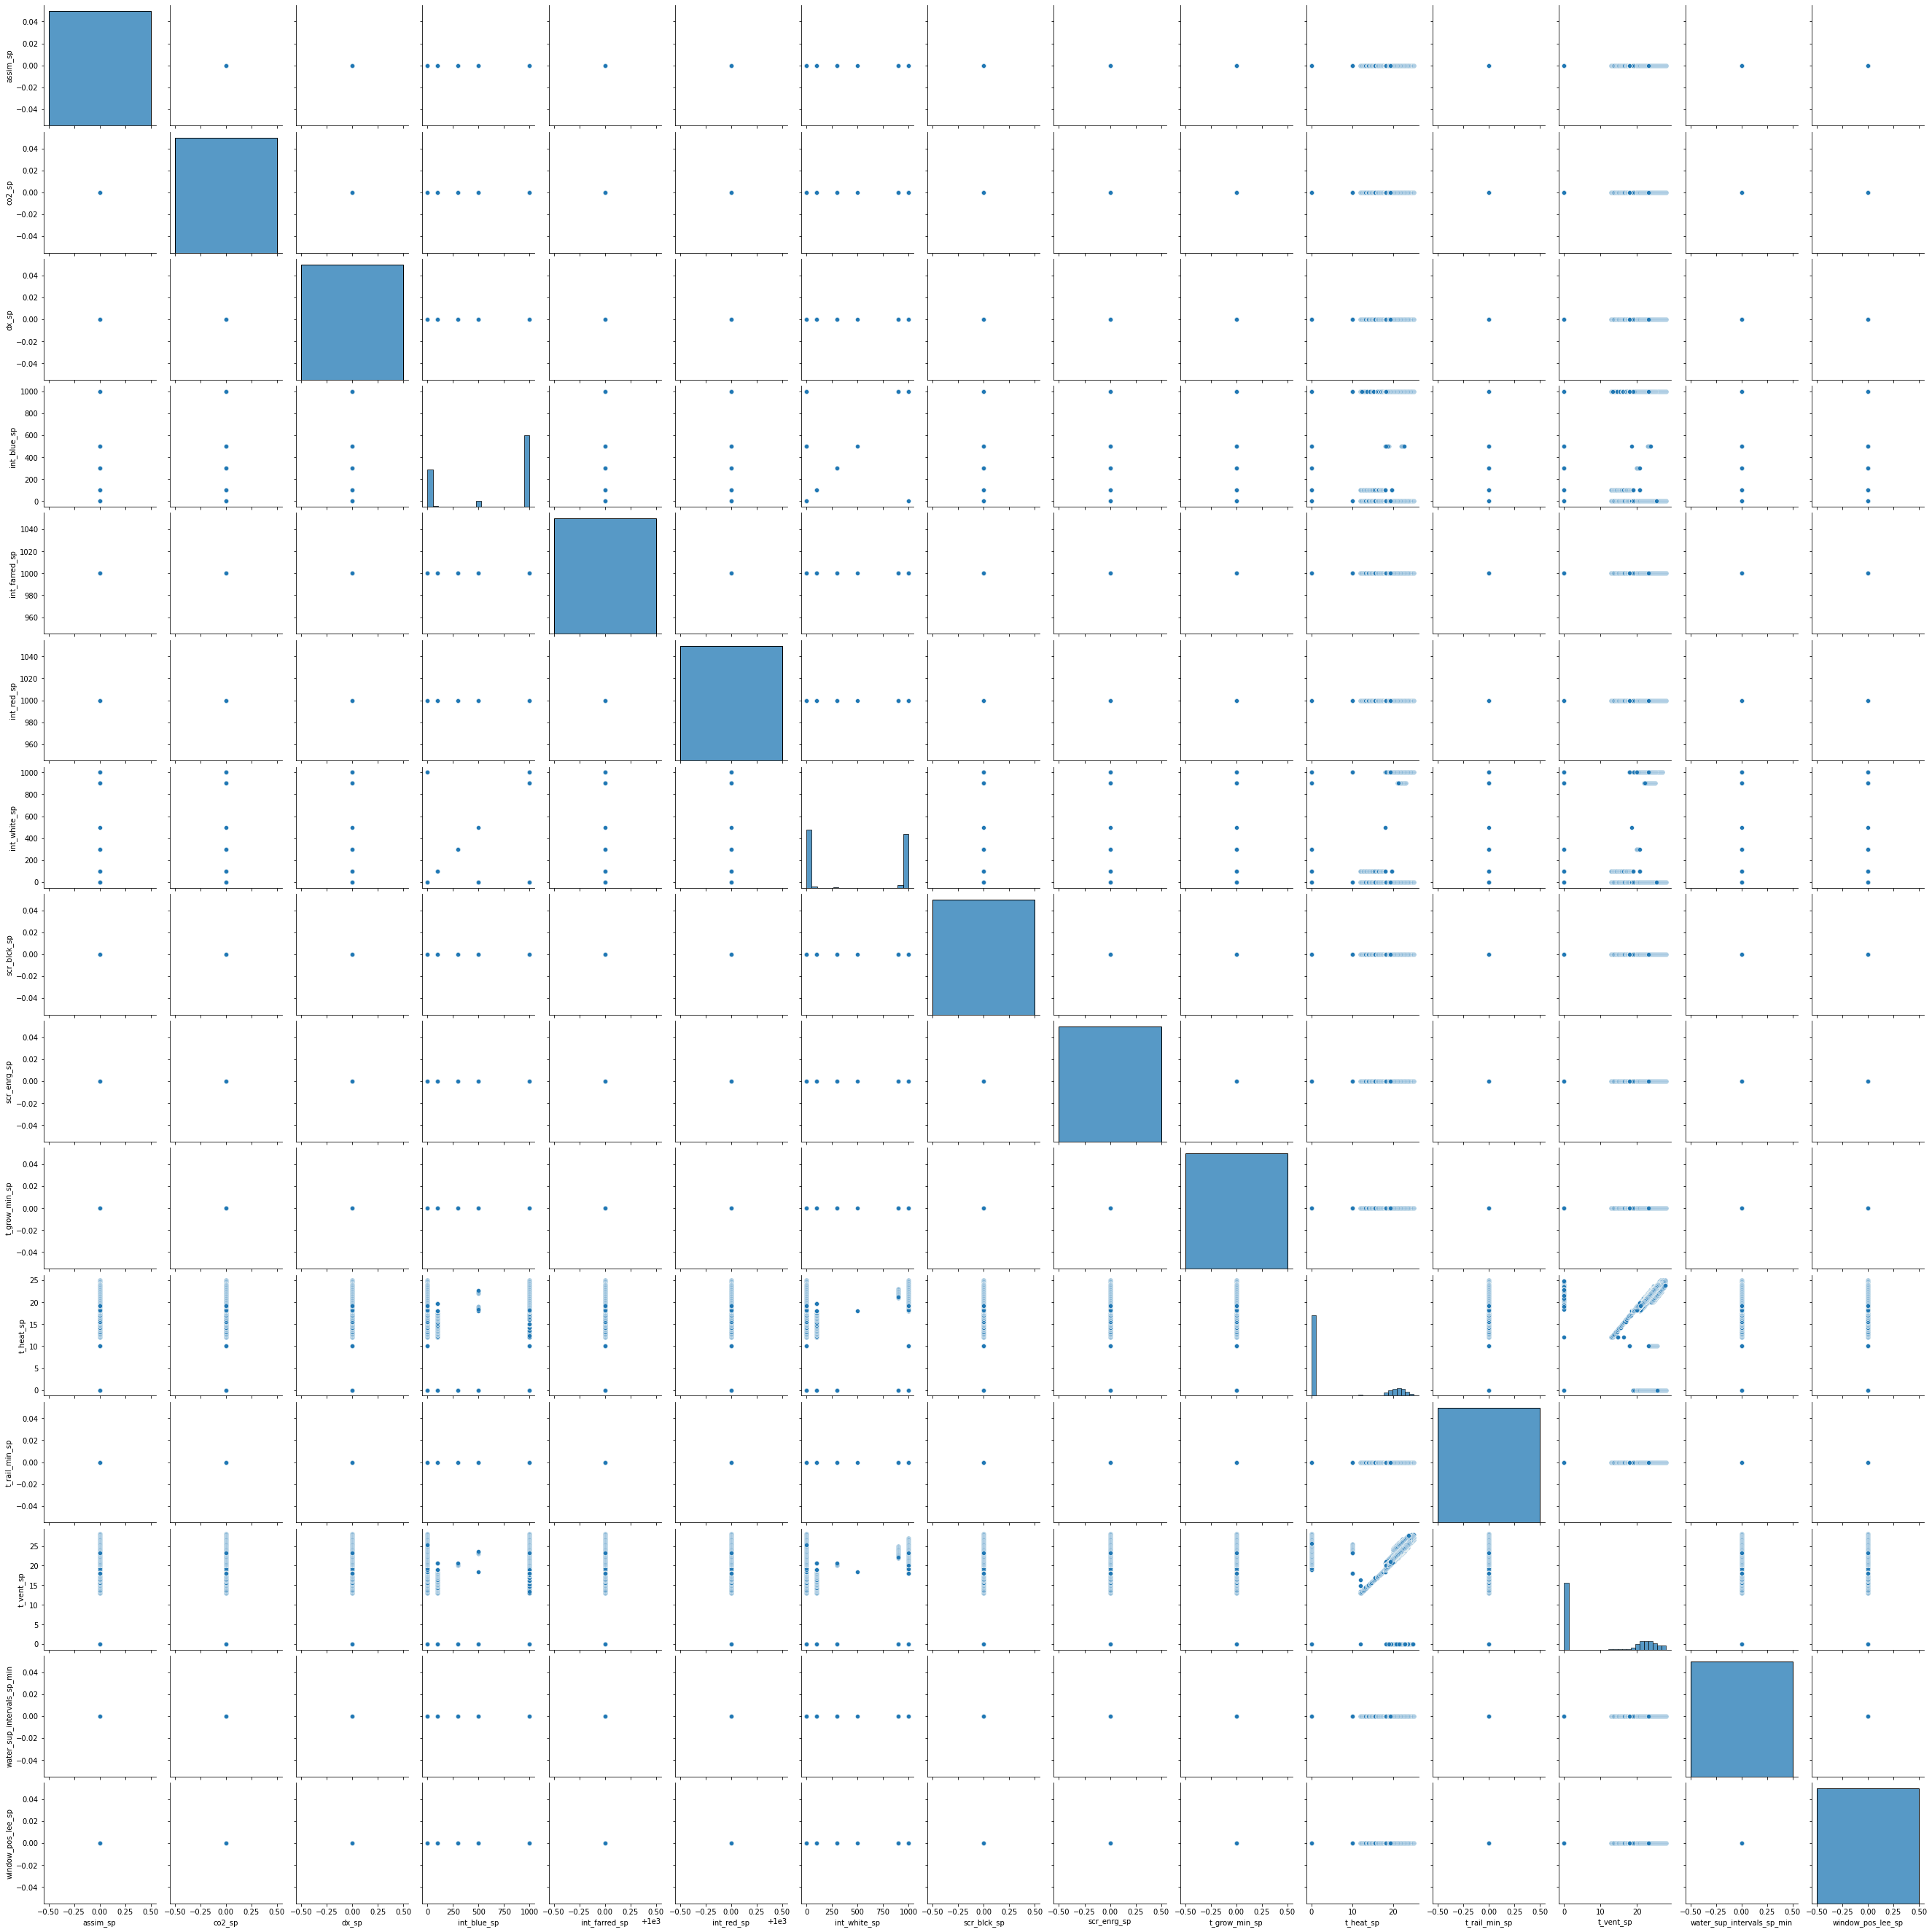

In [ ]:
#sns.pairplot(aicu_climate_sp);

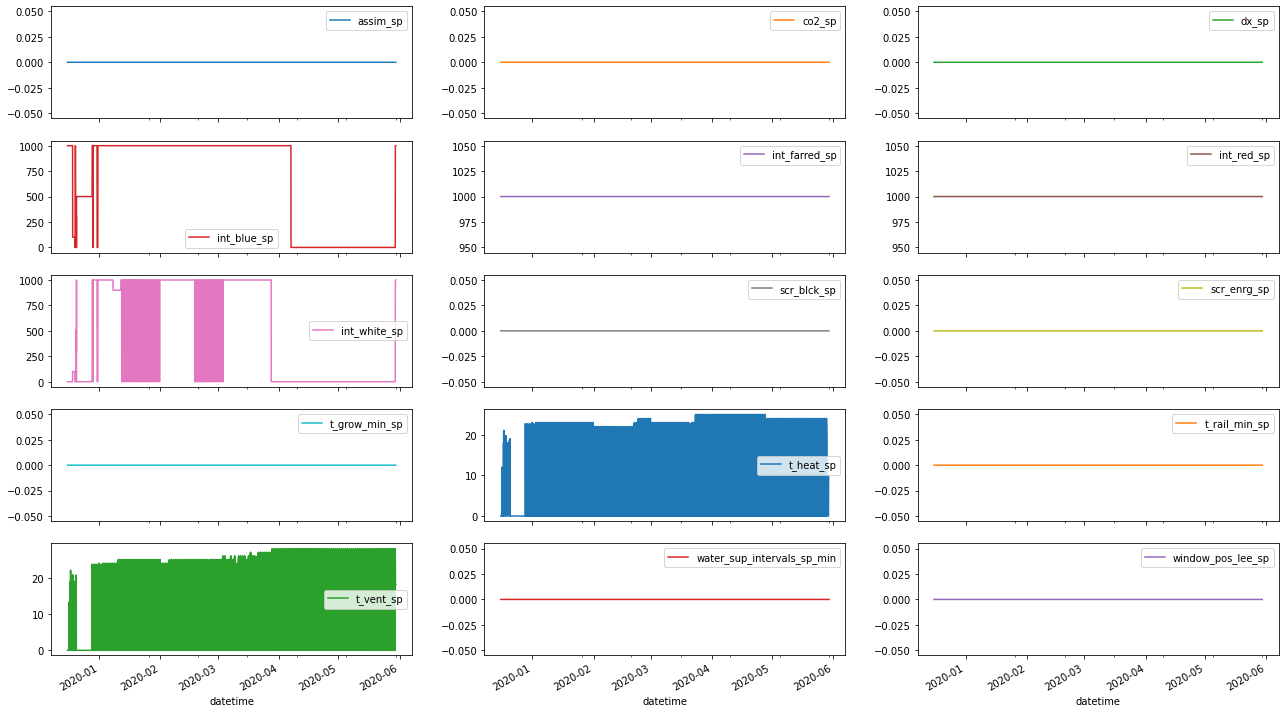

In [ ]:
aicu_climate_sp.plot(figsize = (22, 16), subplots=True, layout=(6, 3),);

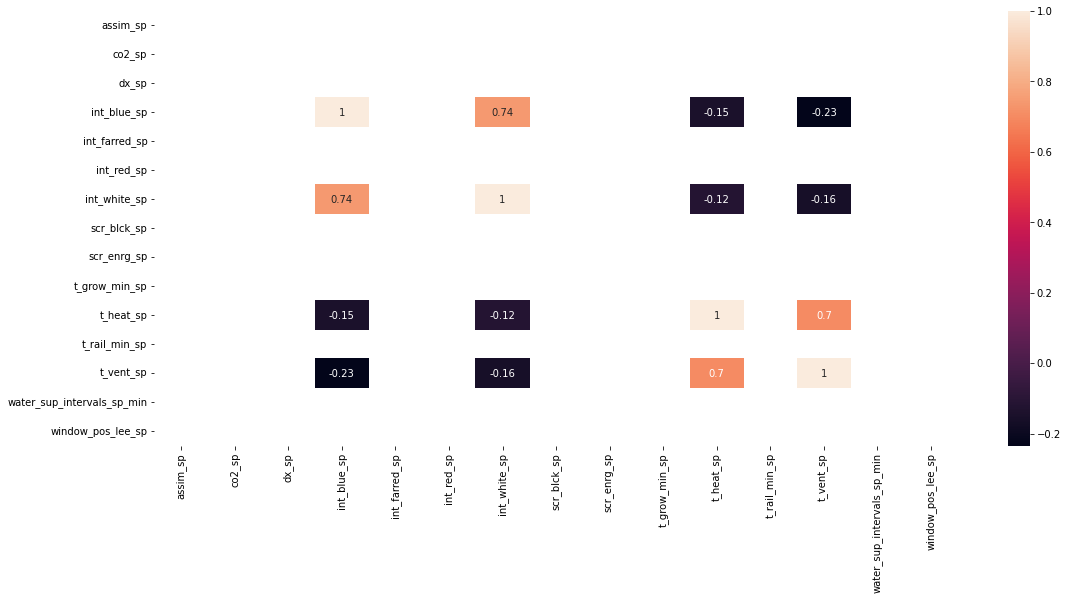

In [ ]:
plt.figure(figsize = (18,8))
sns.heatmap(aicu_climate_sp.corr(), annot = True, );

### 2.2.3 VIP Setpoints

In [ ]:
vip_col_list = [item for item in X_columns.values if 'vip' in item]
vip_col_list

['assim_vip',
 'co2_vip',
 'dx_vip',
 'int_blue_vip',
 'int_farred_vip',
 'int_red_vip',
 'int_white_vip',
 'scr_blck_vip',
 'scr_enrg_vip',
 't_grow_min_vip',
 't_heat_vip',
 't_rail_min_vip',
 't_ventlee_vip',
 't_ventwind_vip',
 'water_sup_intervals_vip_min',
 'window_pos_lee_vip']

In [ ]:
aicu_climate_vip = aicu_climate[vip_col_list]

In [ ]:
#sns.pairplot(aicu_climate_vip);

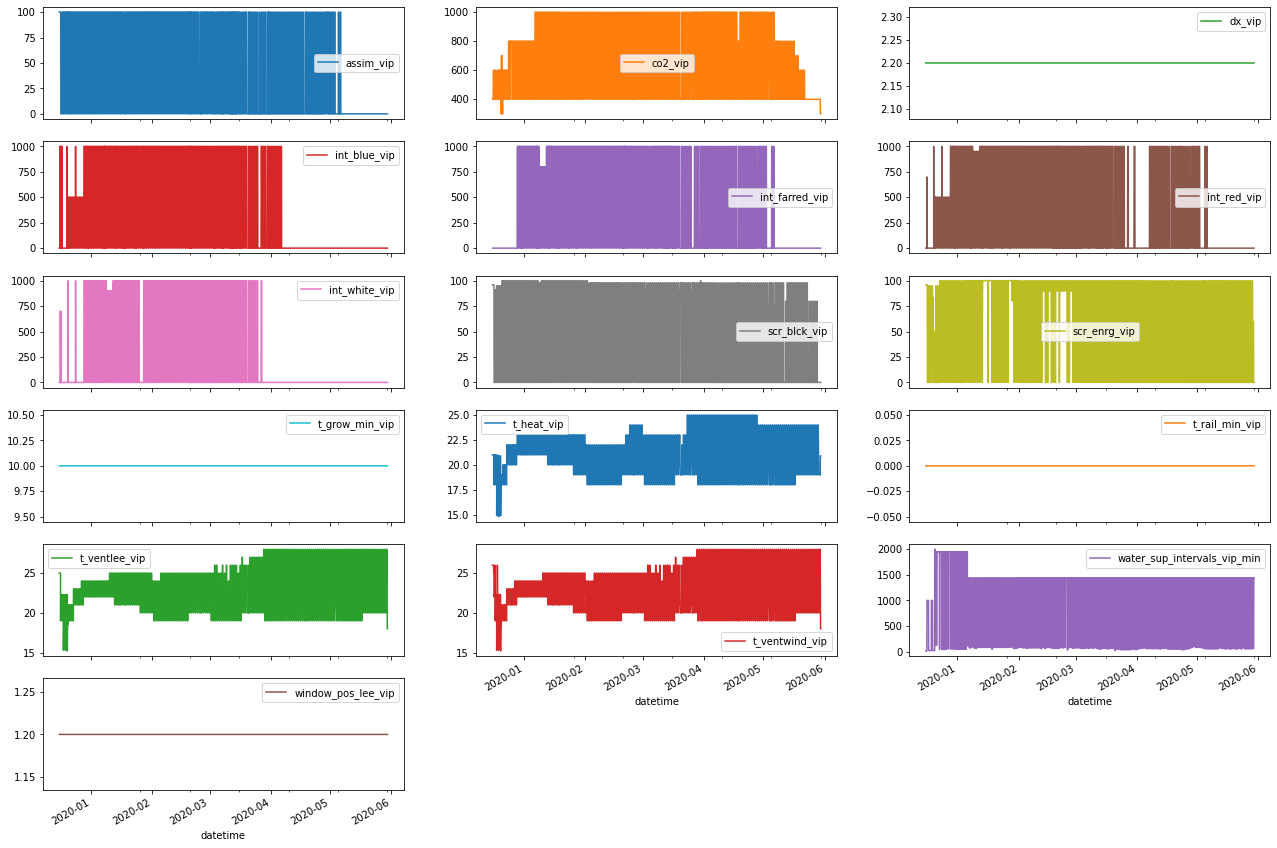

In [ ]:
aicu_climate_vip.plot(figsize = (22, 16), subplots=True, layout=(6, 3),);

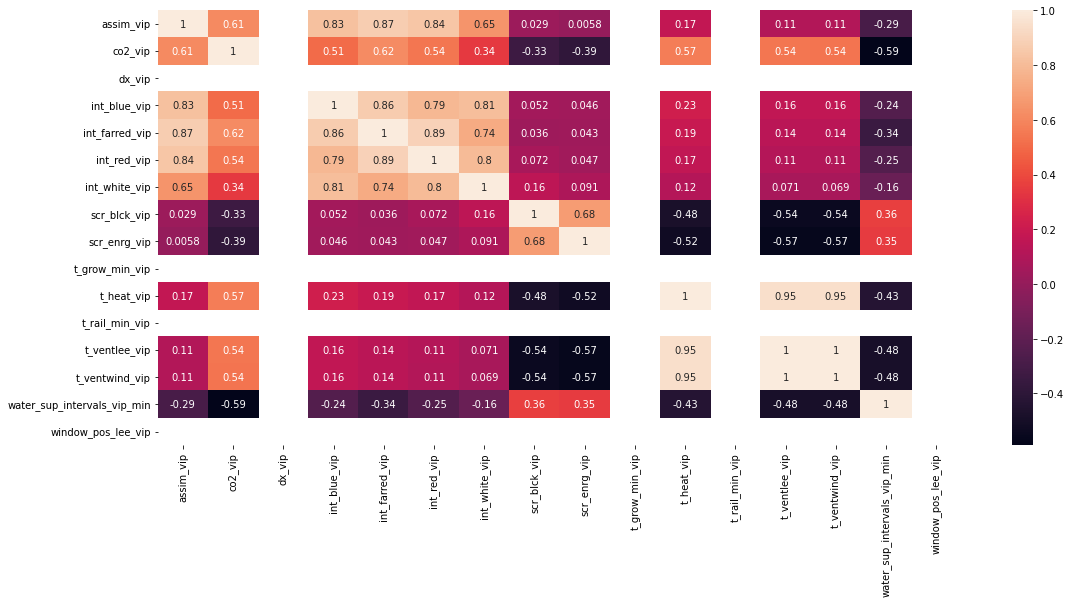

In [ ]:
plt.figure(figsize = (18,8))
sns.heatmap(aicu_climate_vip.corr(), annot = True, );

- t_ventlee & t_ventwind hav correlation value as 1. Lets drop one of them so that same columns are present in Climate & Irrigation Setpoints and VIP Setpoints

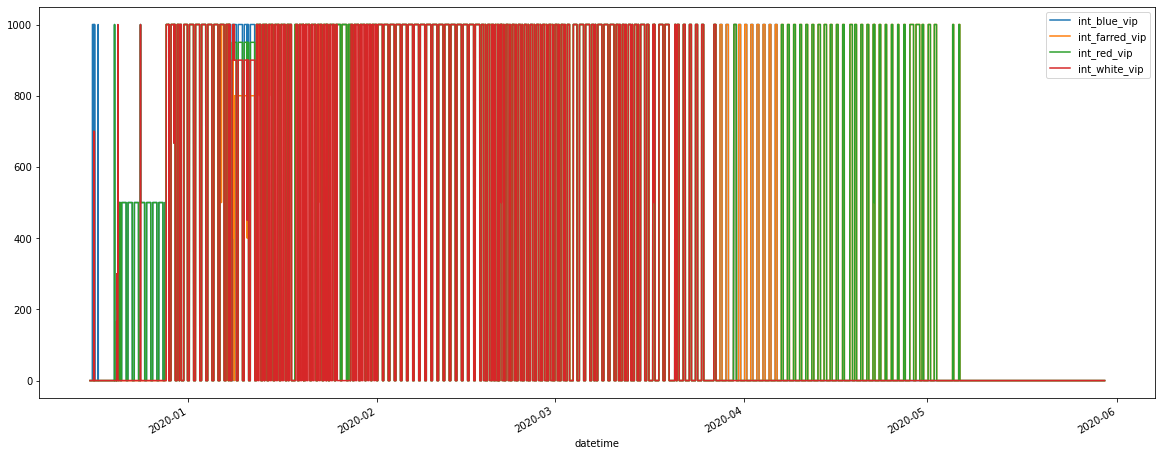

In [ ]:
aicu_climate_vip[['int_blue_vip', 'int_farred_vip', 'int_red_vip', 'int_white_vip']].plot(figsize = (20,8));

In [ ]:
aicu_climate_vip = aicu_climate_vip.drop(['t_ventlee_vip'], axis = 1)

### 2.2.4 VIP & SP combined

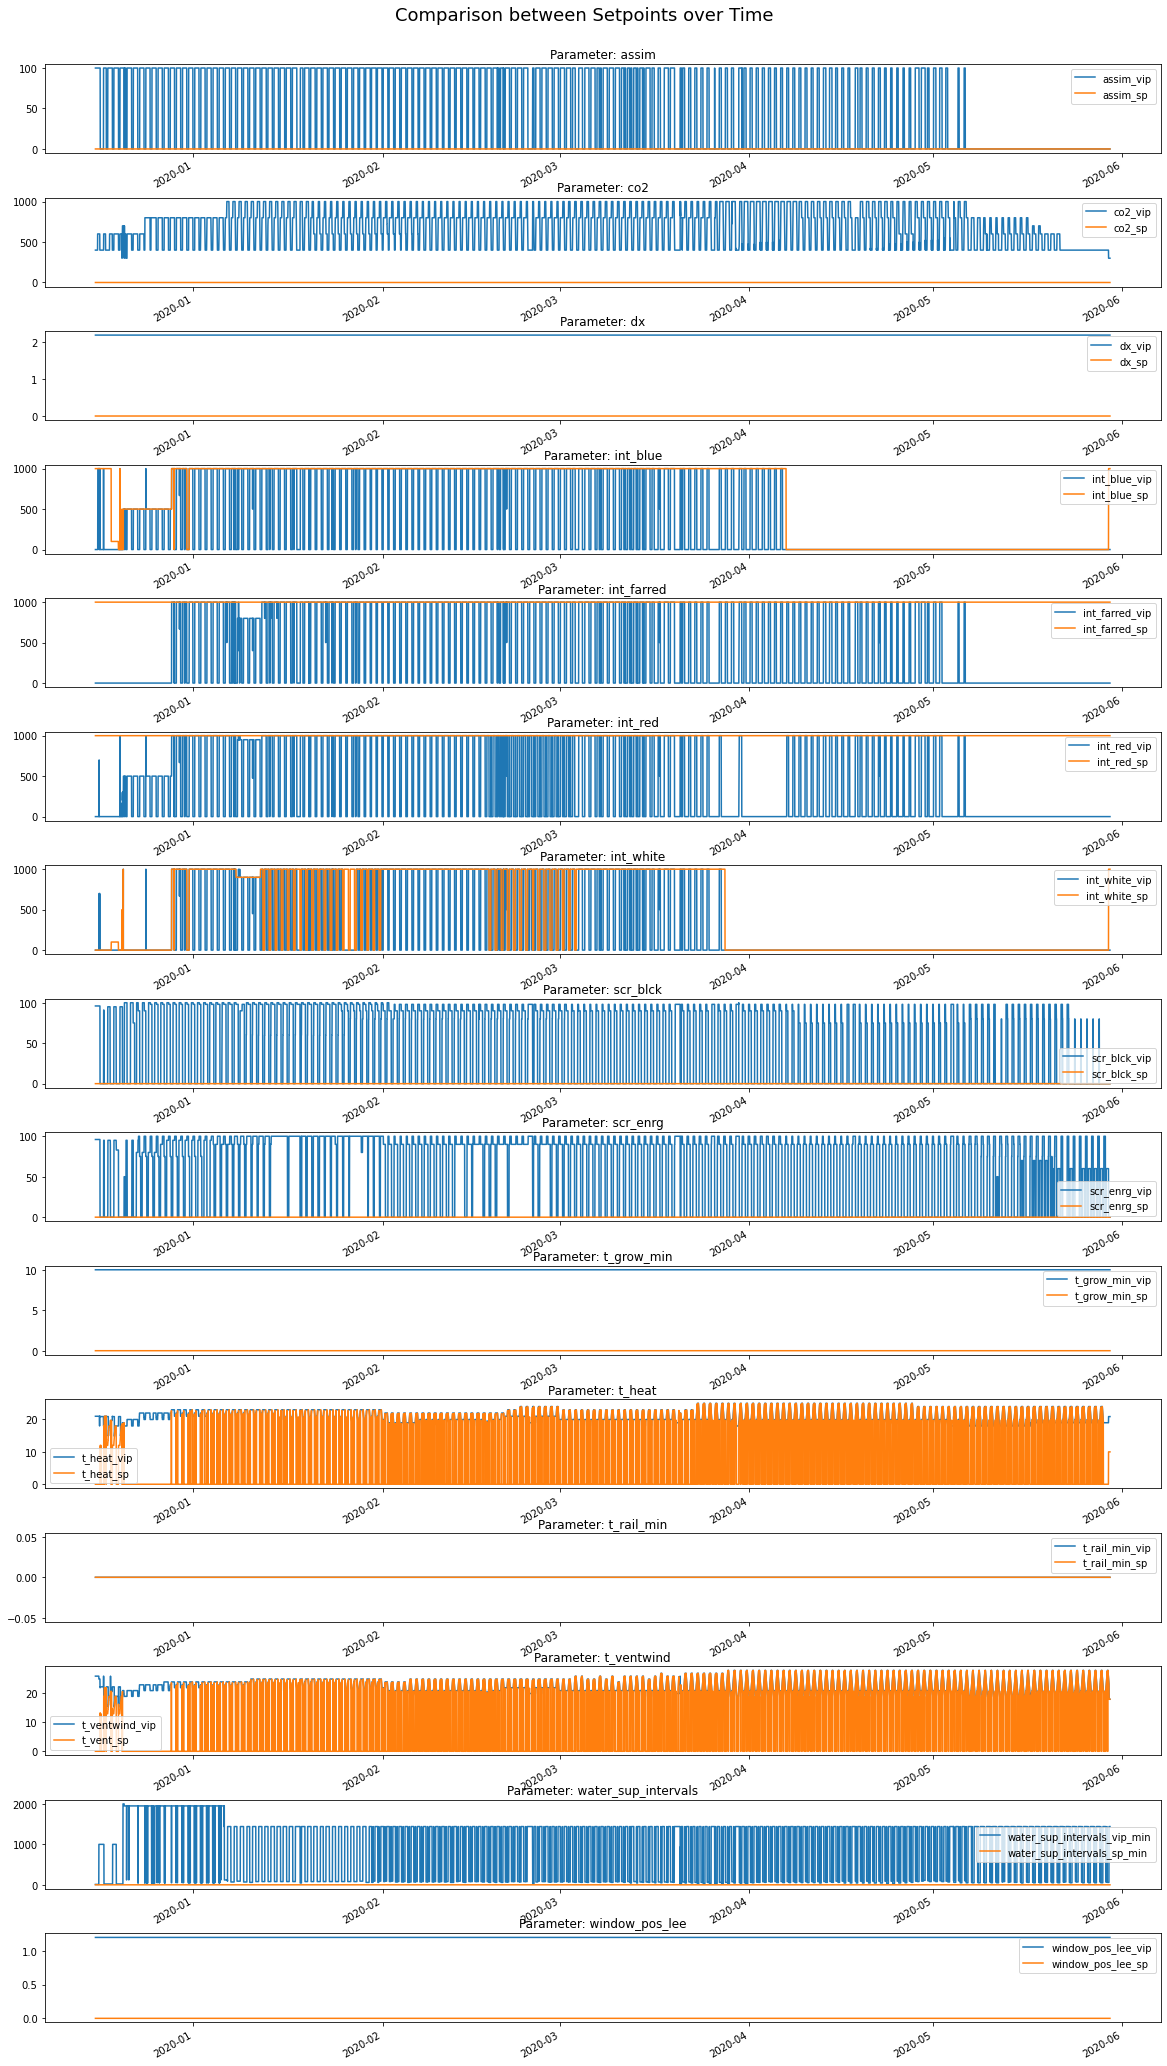

In [ ]:
plt.figure(figsize=(20, 40))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Comparison between Setpoints over Time", fontsize=18, y=0.90)

# loop through the length of tickers and keep track of index
for n in range(15):

    col_name = aicu_climate_vip.columns[n]
    # add a new subplot iteratively
    ax = plt.subplot(15, 1, n + 1)

    # filter df and plot ticker on the new subplot axis
    aicu_climate_vip.iloc[:,n].plot() 
    aicu_climate_sp.iloc[:,n].plot()     
    plt.legend(loc = 'best')

    # chart formatting
    ax.set_title("Parameter: " + col_name.split("_vip")[0])
    #ax.get_legend().remove()
    ax.set_xlabel("")

# 3.0 Grodan Sensors

In [ ]:
aicu_grodan_sens = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/GrodanSens.csv')
aicu_grodan_sens['datetime'] = pd.to_datetime(aicu_grodan_sens['%time'], unit='D', origin='1899-12-30')
aicu_grodan_sens = aicu_grodan_sens.drop(['%time'], axis = 1)

#Removing blank spaces in name of columns, if any
aicu_grodan_sens.columns = aicu_grodan_sens.columns.str.strip()

aicu_grodan_sens.head()

EC_slab1 EC_slab2 WC_slab1 WC_slab2 t_slab1 t_slab2  \
0      NaN      NaN      NaN      NaN     NaN     NaN   
1      NaN      NaN      NaN      NaN     NaN     NaN   
2      NaN      NaN      NaN      NaN     NaN     NaN   
3      NaN      NaN      NaN      NaN     NaN     NaN   
4      NaN      NaN      NaN      NaN     NaN     NaN   

                       datetime  
0 2019-12-16 00:00:00.000000000  
1 2019-12-16 00:04:59.808000256  
2 2019-12-16 00:09:59.616000000  
3 2019-12-16 00:15:00.288000000  
4 2019-12-16 00:20:00.096000256

## 3.1 Pre-Processing

In [ ]:
aicu_grodan_sens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   EC_slab1  47809 non-null  object        
 1   EC_slab2  47809 non-null  object        
 2   WC_slab1  47809 non-null  object        
 3   WC_slab2  47809 non-null  object        
 4   t_slab1   47809 non-null  object        
 5   t_slab2   47809 non-null  object        
 6   datetime  47809 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 2.6+ MB


- FLoat values shown as Object, needs to be converted

### 3.1.1 Object to Float conversion

In [ ]:
columns = aicu_grodan_sens.columns

obj_col_list = []
for i in range(0,aicu_grodan_sens.shape[1]):
  if aicu_grodan_sens[columns[i]].dtypes == 'O':
    obj_col_list.append(columns[i])

for i in range(len(obj_col_list)):
  aicu_grodan_sens[obj_col_list[i]] = aicu_grodan_sens[obj_col_list[i]].astype('float')
aicu_grodan_sens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   EC_slab1  45504 non-null  float64       
 1   EC_slab2  45504 non-null  float64       
 2   WC_slab1  45504 non-null  float64       
 3   WC_slab2  45504 non-null  float64       
 4   t_slab1   45504 non-null  float64       
 5   t_slab2   45504 non-null  float64       
 6   datetime  47809 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.6 MB


### 3.1.2 Missing Values

In [ ]:
aicu_grodan_sens.isna().sum()

EC_slab1    2305
EC_slab2    2305
WC_slab1    2305
WC_slab2    2305
t_slab1     2305
t_slab2     2305
datetime       0
dtype: int64

In [ ]:
aicu_grodan_sens.EC_slab2[0]

nan

- It is Null value but since it has a preceeding space, its not detected as a NaN. Replacing '  NaN' with "NaN"

In [ ]:
aicu_grodan_sens = aicu_grodan_sens.replace('  NaN', np.nan)

In [ ]:
aicu_grodan_sens.isna().sum()

EC_slab1    2305
EC_slab2    2305
WC_slab1    2305
WC_slab2    2305
t_slab1     2305
t_slab2     2305
datetime       0
dtype: int64

In [ ]:
aicu_grodan_sens.head()

EC_slab1  EC_slab2  WC_slab1  WC_slab2  t_slab1  t_slab2  \
0       NaN       NaN       NaN       NaN      NaN      NaN   
1       NaN       NaN       NaN       NaN      NaN      NaN   
2       NaN       NaN       NaN       NaN      NaN      NaN   
3       NaN       NaN       NaN       NaN      NaN      NaN   
4       NaN       NaN       NaN       NaN      NaN      NaN   

                       datetime  
0 2019-12-16 00:00:00.000000000  
1 2019-12-16 00:04:59.808000256  
2 2019-12-16 00:09:59.616000000  
3 2019-12-16 00:15:00.288000000  
4 2019-12-16 00:20:00.096000256

In [ ]:
aicu_grodan_sens.shape

(47809, 7)

- Dropping rows with NUll values

In [ ]:
aicu_grodan_sens = aicu_grodan_sens.dropna()
aicu_grodan_sens.shape

(45504, 7)

In [ ]:
aicu_grodan_sens.head()

EC_slab1  EC_slab2  WC_slab1  WC_slab2  t_slab1  t_slab2  \
156       4.7       4.9      93.0      92.1     22.1     22.3   
393       4.9       5.1      92.6      91.1     15.4     15.7   
394       4.9       5.1      92.8      91.1     15.5     15.8   
395       4.9       5.1      92.7      91.3     15.6     15.8   
396       4.9       5.1      92.7      91.5     15.7     15.9   

                         datetime  
156 2019-12-16 13:00:00.288000000  
393 2019-12-17 08:44:59.712000000  
394 2019-12-17 08:50:00.384000000  
395 2019-12-17 08:55:00.191999744  
396 2019-12-17 09:00:00.000000000

### 3.1.3 Outlier Detection

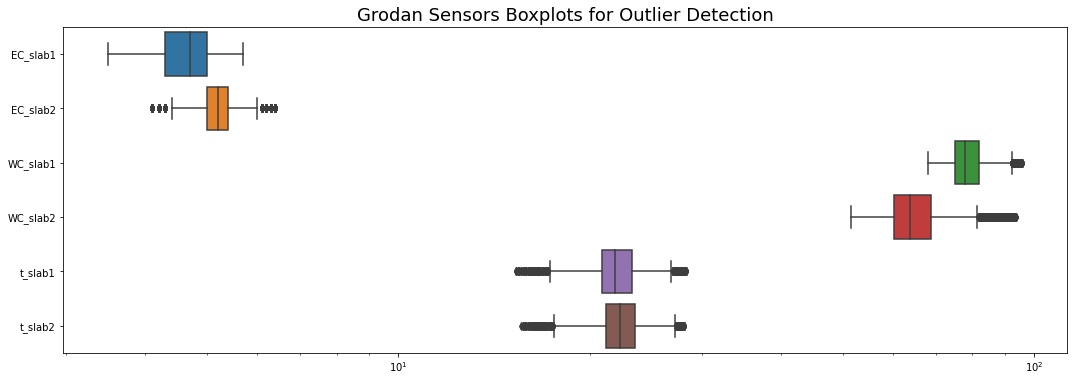

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (18,6))
ax =sns.boxplot(data = aicu_grodan_sens, orient="h")
ax.set_title('Grodan Sensors Boxplots for Outlier Detection', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [ ]:
aicu_grodan_sens = aicu_grodan_sens.set_index('datetime')

## 3.2 EDA

In [ ]:
aicu_grodan_sens.head()

EC_slab1  EC_slab2  WC_slab1  WC_slab2  \
datetime                                                                
2019-12-16 13:00:00.288000000       4.7       4.9      93.0      92.1   
2019-12-17 08:44:59.712000000       4.9       5.1      92.6      91.1   
2019-12-17 08:50:00.384000000       4.9       5.1      92.8      91.1   
2019-12-17 08:55:00.191999744       4.9       5.1      92.7      91.3   
2019-12-17 09:00:00.000000000       4.9       5.1      92.7      91.5   

                               t_slab1  t_slab2  
datetime                                         
2019-12-16 13:00:00.288000000     22.1     22.3  
2019-12-17 08:44:59.712000000     15.4     15.7  
2019-12-17 08:50:00.384000000     15.5     15.8  
2019-12-17 08:55:00.191999744     15.6     15.8  
2019-12-17 09:00:00.000000000     15.7     15.9

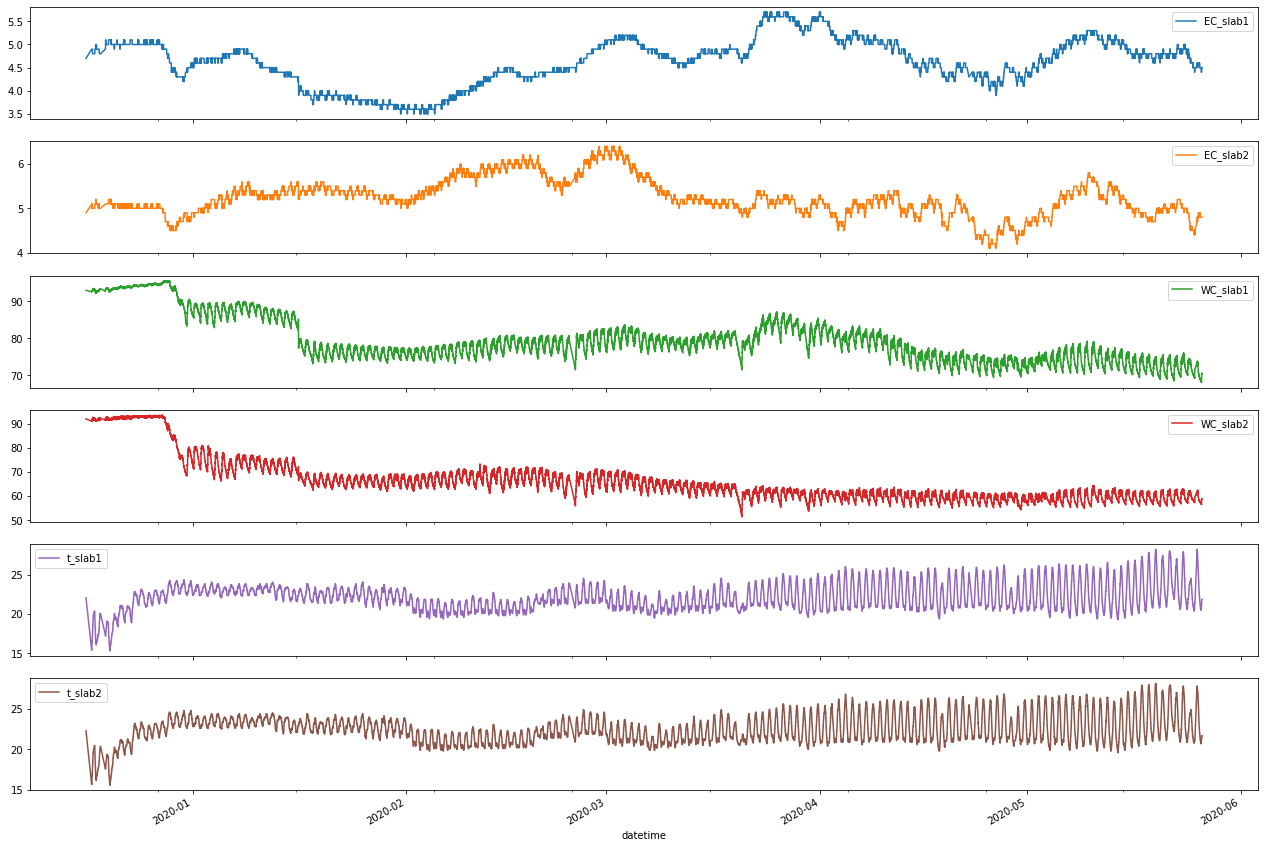

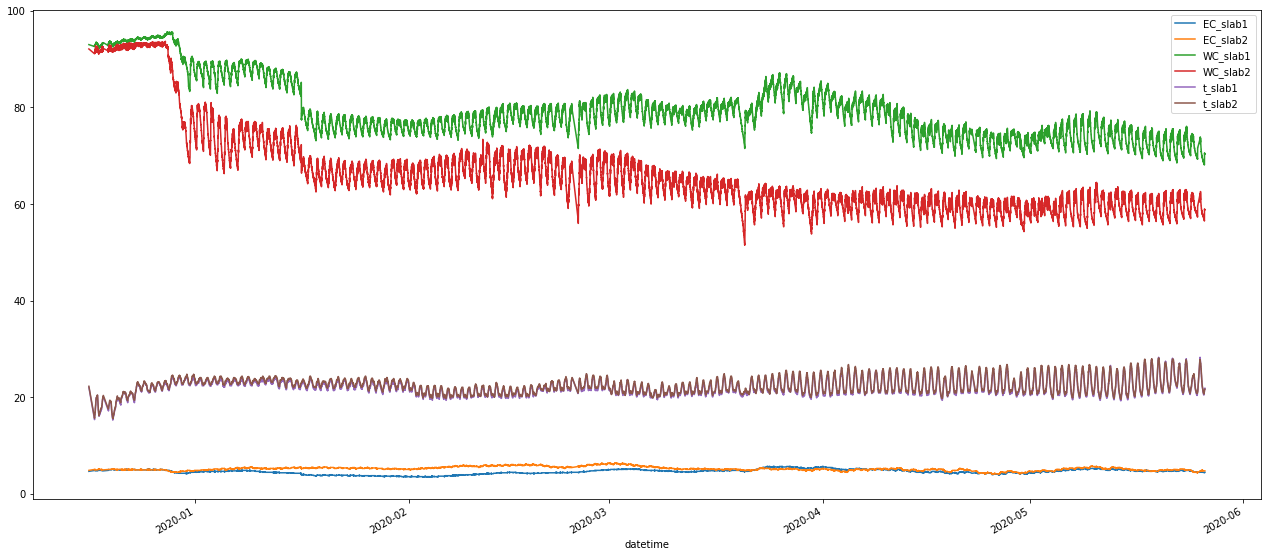

In [ ]:
aicu_grodan_sens.plot(figsize = (22, 16), subplots=True, layout=(6, 1), );
aicu_grodan_sens.plot(figsize = (22, 10), );

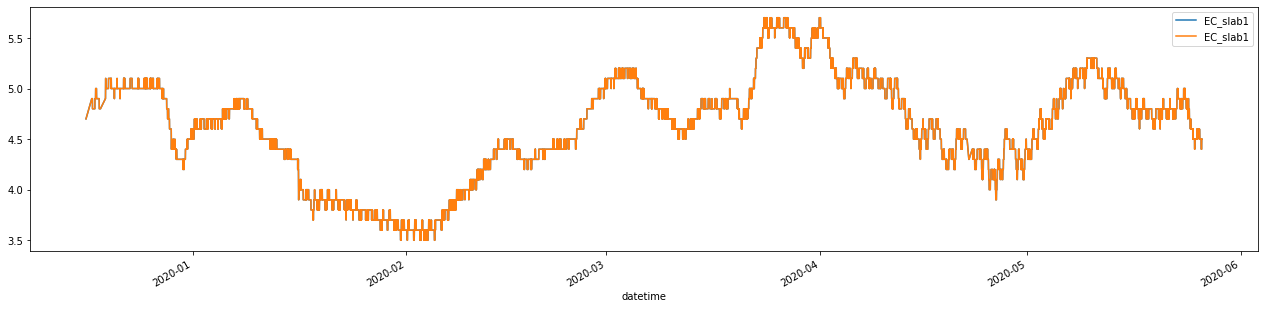

In [ ]:
aicu_grodan_sens[['EC_slab1', 'EC_slab1']].plot(figsize = (22, 5), );

- Temperature & Electrical Conductivity variation across 2 slabs is same
- Water content is high in slab 1 compared to slab 2

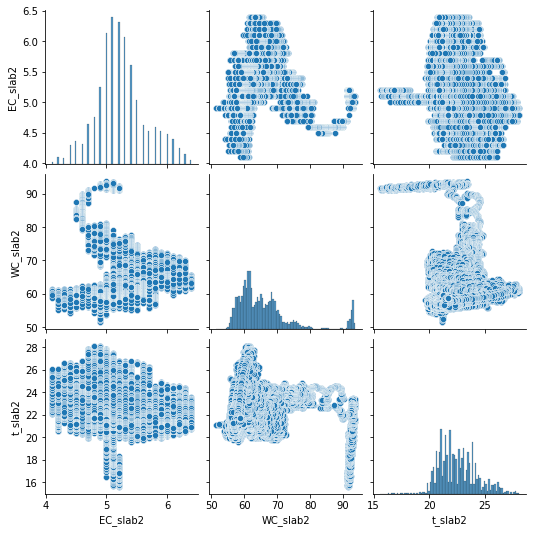

In [ ]:
sns.pairplot(aicu_grodan_sens[['EC_slab2', 'WC_slab2', 't_slab2']]);

# 4.0 Lab Analysis

In [ ]:
aicu_lab = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/LabAnalysis.csv')
aicu_lab['datetime'] = pd.to_datetime(aicu_lab['%Time'], unit='D', origin='1899-12-30')
aicu_lab = aicu_lab.drop(['%Time'], axis = 1)

#Removing blank spaces in name of columns, if any
aicu_lab.columns = aicu_lab.columns.str.strip()

aicu_lab.head()

irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  irr_NO3  \
0     5.3     4.3      1.1   15.2     0.3     9.6     4.9    0.09     21.7   
1     5.2     4.0      1.1   11.3     0.3     9.8     4.1    0.09     21.0   
2     4.8     3.9      1.3   11.6     0.3    10.2     3.5    0.09     18.6   
3     4.8     3.7      1.4   13.3     0.4     8.2     2.8    0.09     16.0   
4     4.7     3.5      1.1   11.3     0.4     7.6     2.5    0.01     14.1   

   irr_Cl  ...  drain_SO4  drain_HCO3  drain_PO4  drain_Fe  drain_Mn  \
0     5.7  ...       13.5         1.4       2.00      27.8       7.7   
1     5.3  ...       23.4         1.3       0.42      21.1       0.8   
2     8.2  ...       17.5         1.0       1.30      18.3       1.1   
3     7.2  ...       13.2         0.1       6.10      24.4       4.5   
4     6.6  ...       11.6         0.1       9.32      31.0      11.0   

   drain_Zn  drain_B  drain_Cu  drain_Mo   datetime  
0       5.7     49.0       0.9      0.61 2020-01-06  
1       6.4     56.0       0.7      0.94 2020-01-20  
2       3.7     93.0       0.5      0.47 2020-02-03  
3       3.8    134.0       1.0      0.13 2020-02-18  
4       6.5    113.0       1.1      0.10 2020-03-03  

[5 rows x 39 columns]

In [ ]:
aicu_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   irr_PH      10 non-null     float64       
 1   irr_EC      10 non-null     float64       
 2   irr_NH4     10 non-null     float64       
 3   irr_K       10 non-null     float64       
 4   irr_Na      10 non-null     float64       
 5   irr_Ca      10 non-null     float64       
 6   irr_Mg      10 non-null     float64       
 7   irr_Si      10 non-null     float64       
 8   irr_NO3     10 non-null     float64       
 9   irr_Cl      10 non-null     float64       
 10  irr_SO4     10 non-null     float64       
 11  irr_HCO3    10 non-null     float64       
 12  irr_PO4     10 non-null     float64       
 13  irr_Fe      10 non-null     float64       
 14  irr_Mn      10 non-null     float64       
 15  irr_Zn      10 non-null     float64       
 16  irr_B       10 non-null     f

- Outlier Detection

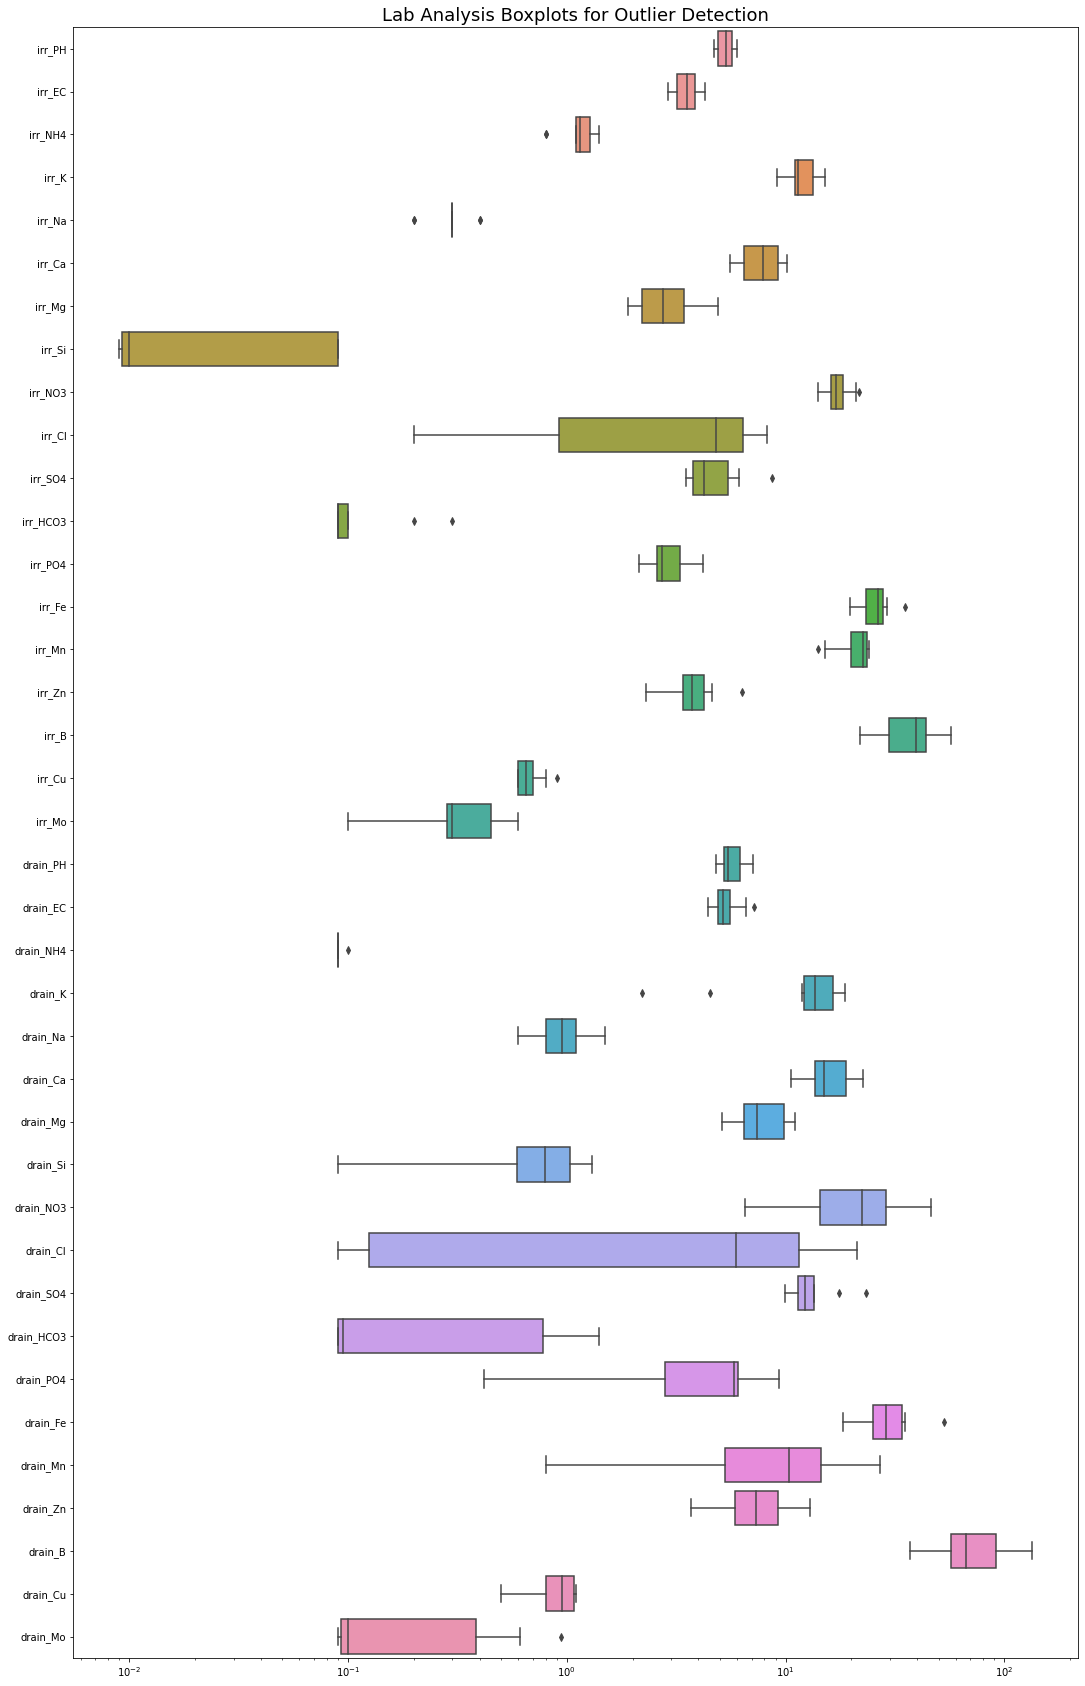

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (18,30))
ax =sns.boxplot(data = aicu_lab, orient="h")
ax.set_title('Lab Analysis Boxplots for Outlier Detection', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [ ]:
aicu_lab = aicu_lab.set_index('datetime')

## 4.1 EDA

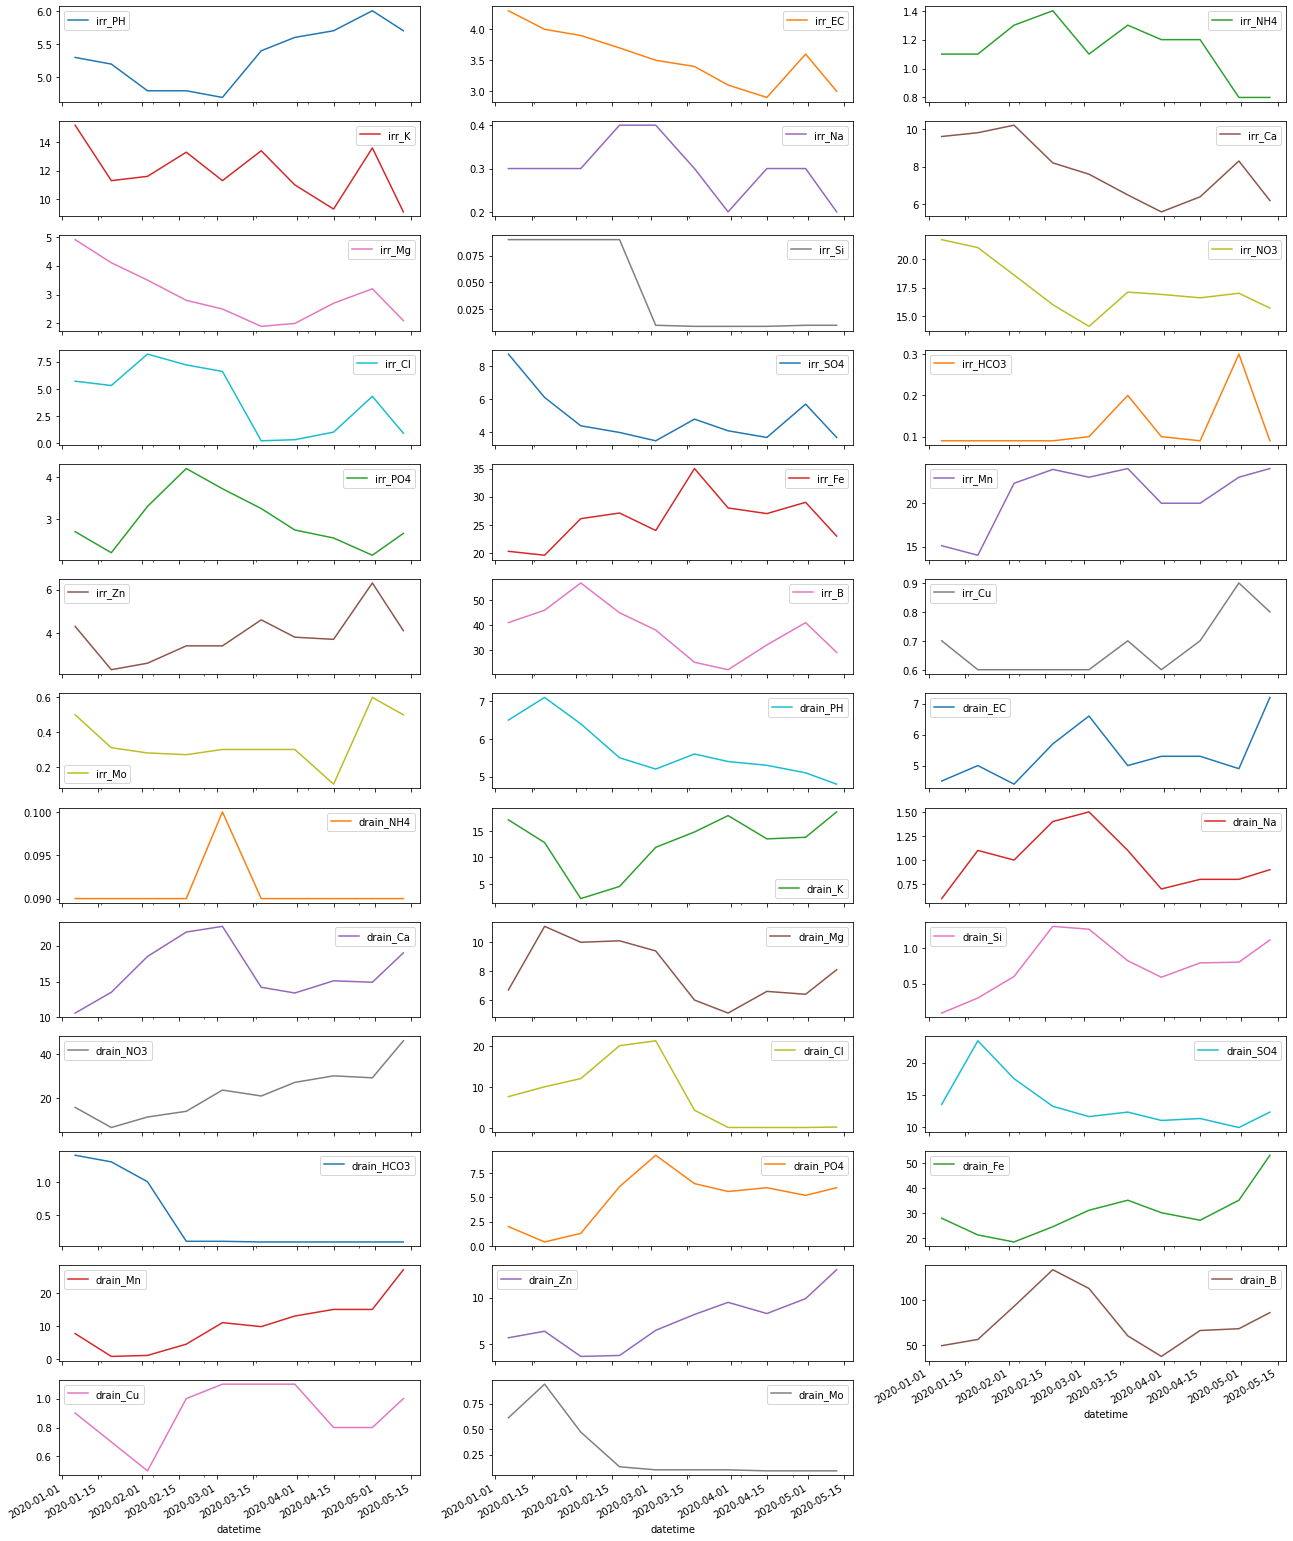

In [ ]:
aicu_lab.plot(figsize = (22, 30), subplots=True, layout=(13, 3), );

In [ ]:
columns = aicu_lab.columns
columns

Index(['irr_PH', 'irr_EC', 'irr_NH4', 'irr_K', 'irr_Na', 'irr_Ca', 'irr_Mg',
       'irr_Si', 'irr_NO3', 'irr_Cl', 'irr_SO4', 'irr_HCO3', 'irr_PO4',
       'irr_Fe', 'irr_Mn', 'irr_Zn', 'irr_B', 'irr_Cu', 'irr_Mo', 'drain_PH',
       'drain_EC', 'drain_NH4', 'drain_K', 'drain_Na', 'drain_Ca', 'drain_Mg',
       'drain_Si', 'drain_NO3', 'drain_Cl', 'drain_SO4', 'drain_HCO3',
       'drain_PO4', 'drain_Fe', 'drain_Mn', 'drain_Zn', 'drain_B', 'drain_Cu',
       'drain_Mo'],
      dtype='object')

In [ ]:
tickers = columns[:19]

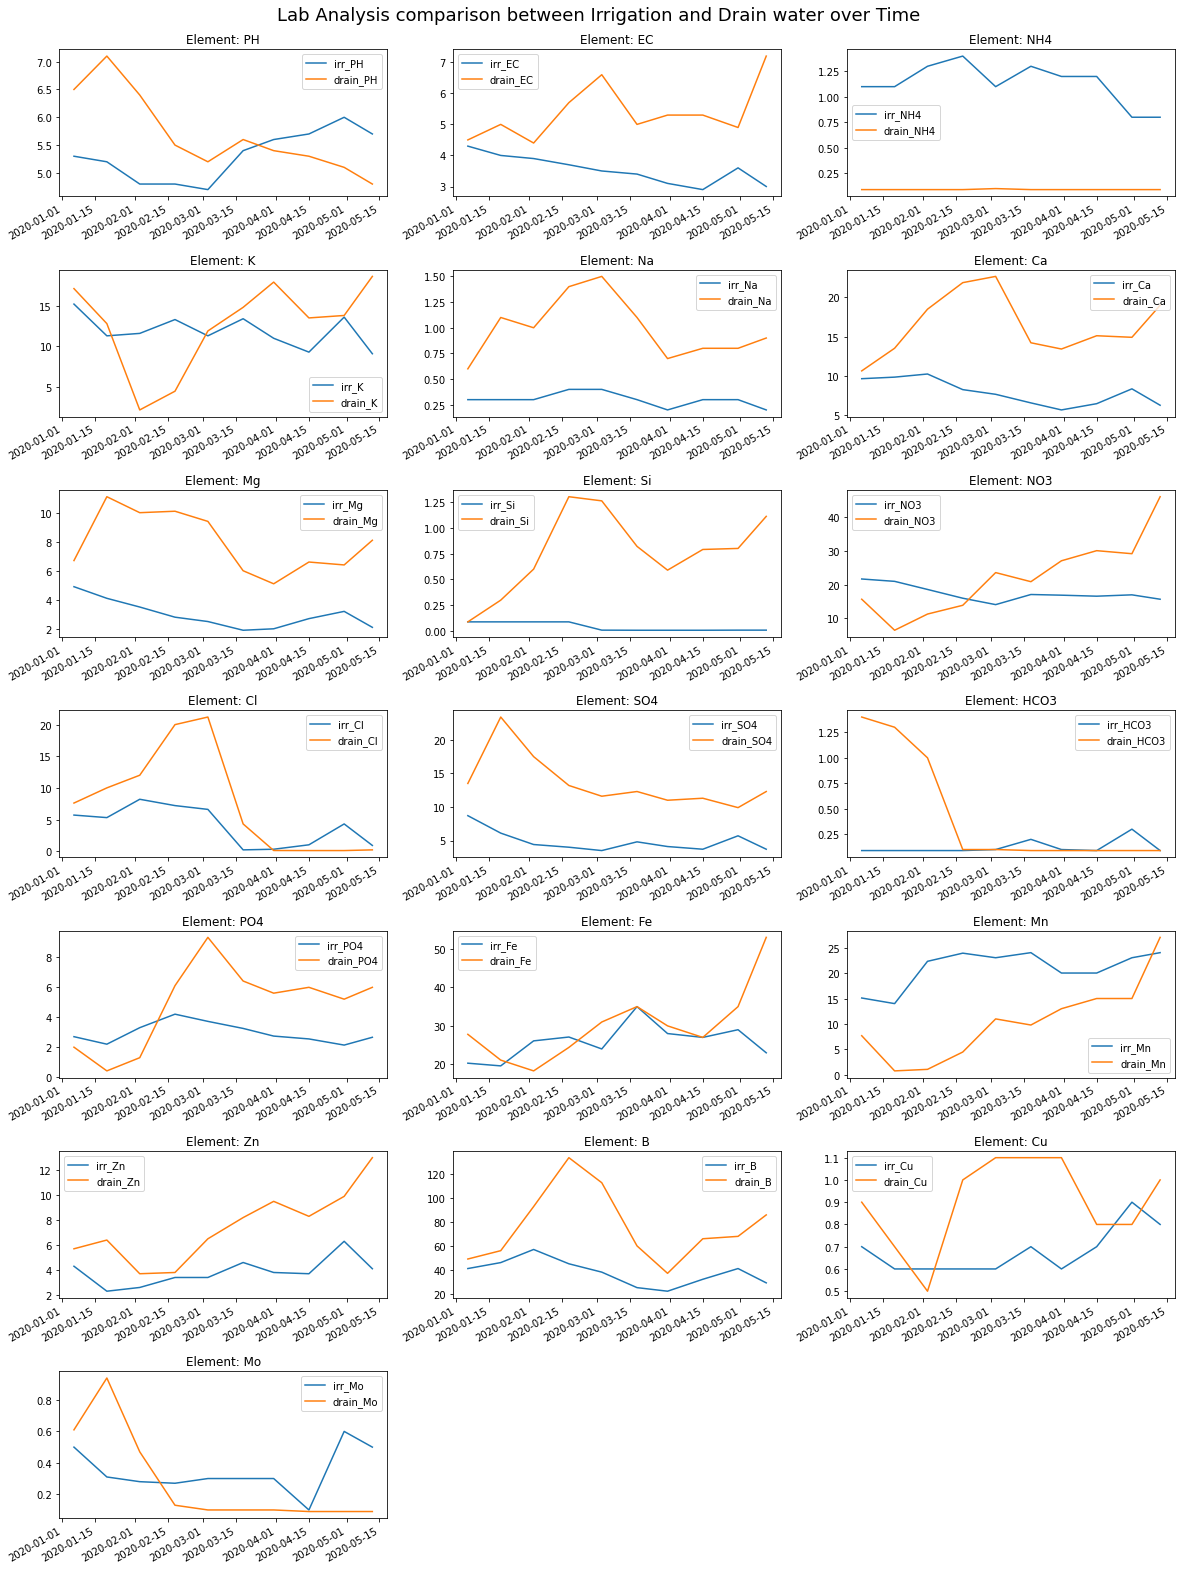

In [ ]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Lab Analysis comparison between Irrigation and Drain water over Time", fontsize=18, y=0.90)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(7, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
    aicu_lab.iloc[:,n].plot()
    aicu_lab.iloc[:,n + 19].plot()  
    plt.legend(loc = 'best')

    # chart formatting
    ax.set_title("Element: " + ticker.split("_")[1])
    #ax.get_legend().remove()
    ax.set_xlabel("")

- It makes sense that the drainage water will have lower concentration of elements compared to irrigation as the same will be absorbed by crops for thier growth

# 5.0 Production

In [ ]:
aicu_prod = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/Production.csv')
aicu_prod['datetime'] = pd.to_datetime(aicu_prod['%time'], unit='D', origin='1899-12-30')
aicu_prod = aicu_prod.drop(['%time'], axis = 1)

#Removing blank spaces in name of columns, if any
aicu_prod.columns = aicu_prod.columns.str.strip()

aicu_prod.head(4)

ProdA  ProdB  avg_nr_harvested_trusses  Truss development time  \
0   0.12    0.0                       0.2                    45.0   
1   0.50    0.0                       1.1                    48.7   
2   0.58    0.0                       1.0                    48.3   
3   0.27    0.0                       0.8                    50.1   

   Nr_fruits_ClassA  Weight_fruits_ClassA  Nr_fruits_ClassB  \
0               NaN                 213.0                 0   
1               NaN                1250.0                 0   
2             131.0                1224.0                 0   
3             128.0                1187.0                 0   

   Weight_fruits_ClassB   datetime  
0                     0 2020-02-14  
1                     0 2020-02-19  
2                     0 2020-02-24  
3                     0 2020-02-28

## 5.1 Preprocessing

In [ ]:
aicu_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ProdA                     24 non-null     float64       
 1   ProdB                     24 non-null     float64       
 2   avg_nr_harvested_trusses  24 non-null     float64       
 3   Truss development time    24 non-null     float64       
 4   Nr_fruits_ClassA          22 non-null     float64       
 5   Weight_fruits_ClassA      24 non-null     float64       
 6   Nr_fruits_ClassB          24 non-null     int64         
 7   Weight_fruits_ClassB      24 non-null     int64         
 8   datetime                  24 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 1.8 KB


In [ ]:
aicu_prod['Nr_fruits_ClassA'] = aicu_prod['Nr_fruits_ClassA'].fillna(aicu_prod['Nr_fruits_ClassA'].median())

In [ ]:
aicu_prod.isna().sum().sum()

0

- No missing values

### 5.1.1 Outlier Detection

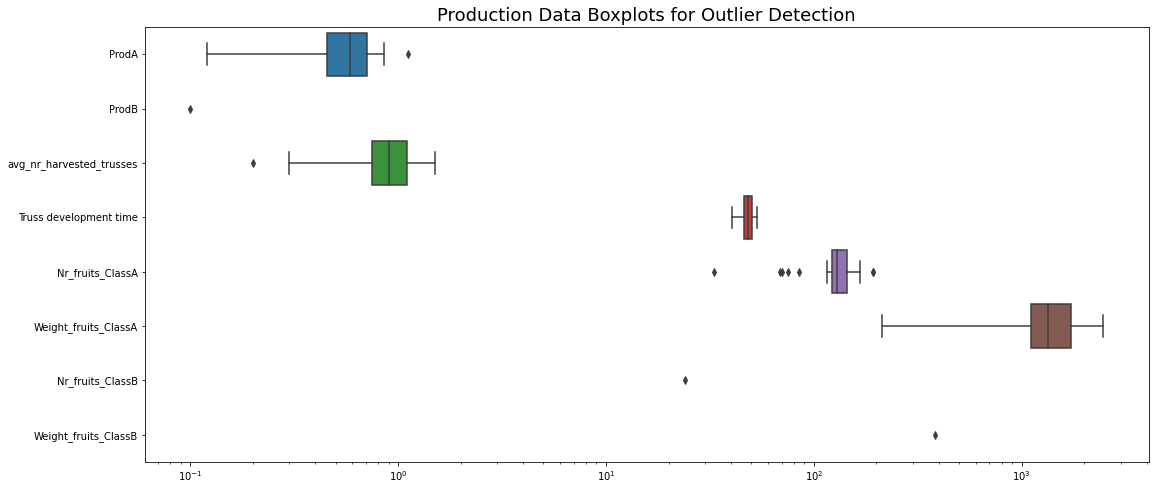

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (18,8))
ax =sns.boxplot(data = aicu_prod, orient="h")
ax.set_title('Production Data Boxplots for Outlier Detection', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [ ]:
aicu_prod = aicu_prod.set_index('datetime')

## 5.2 EDA

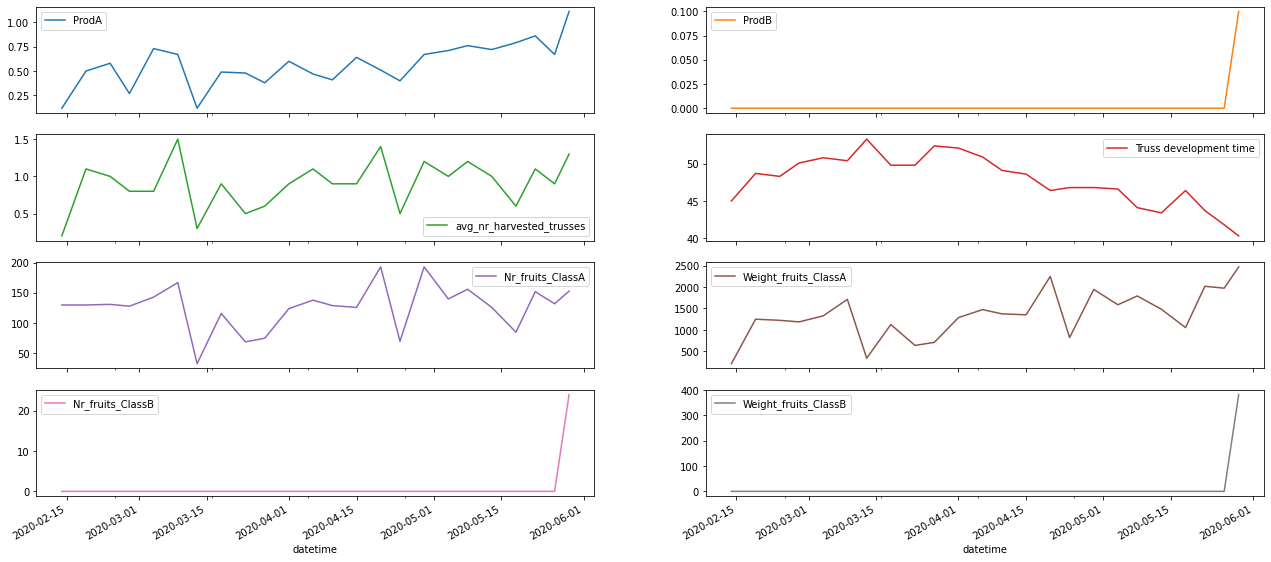

In [ ]:
aicu_prod.plot(figsize = (22, 10), subplots=True, layout=(4, 2), );

<function matplotlib.pyplot.show(*args, **kw)>

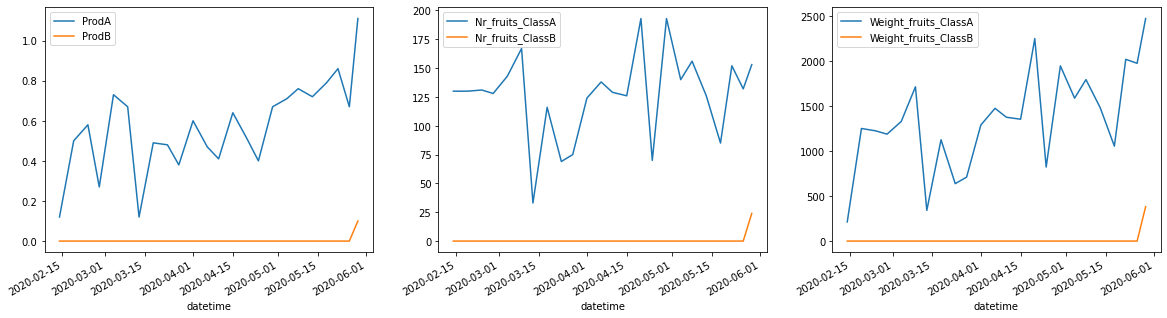

In [ ]:
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 3, 1)
aicu_prod['ProdA'].plot()
aicu_prod['ProdB'].plot()  
plt.legend(loc = 'best')
plt.show

ax = plt.subplot(1, 3, 2)
aicu_prod['Nr_fruits_ClassA'].plot()
aicu_prod['Nr_fruits_ClassB'].plot()  
plt.legend(loc = 'best')
plt.show

ax = plt.subplot(1, 3, 3)
aicu_prod['Weight_fruits_ClassA'].plot()
aicu_prod['Weight_fruits_ClassB'].plot()  
plt.legend(loc = 'best')
plt.show

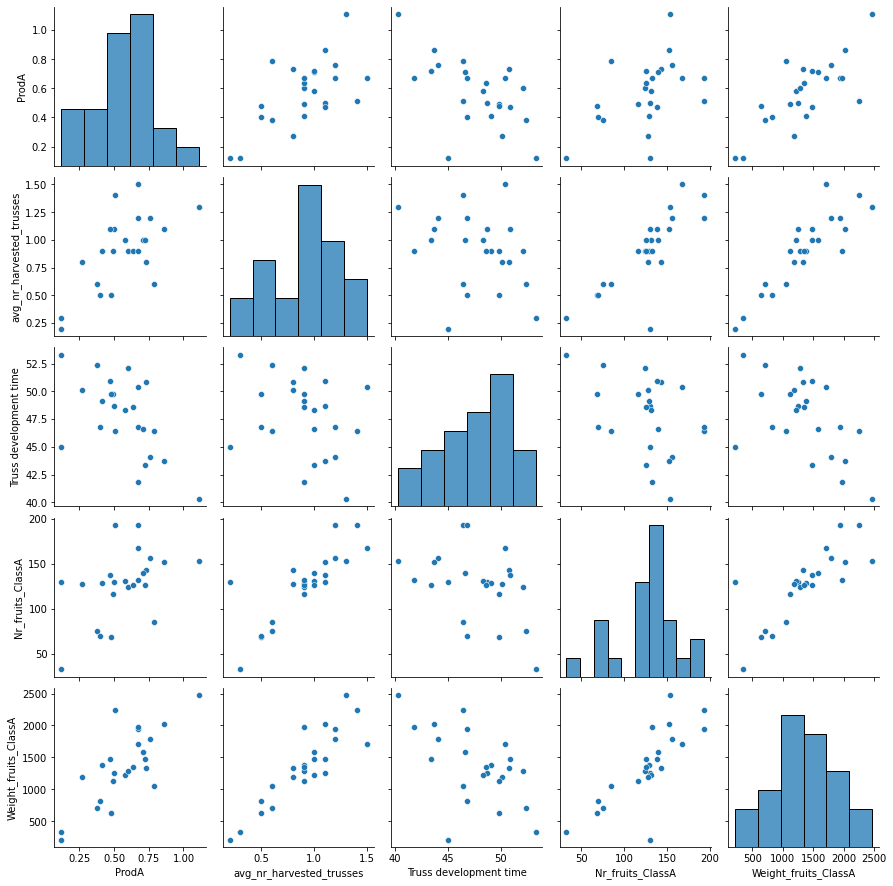

In [ ]:
sns.pairplot(aicu_prod[['ProdA', 'avg_nr_harvested_trusses', 'Truss development time',
       'Nr_fruits_ClassA', 'Weight_fruits_ClassA']]);

- Truss development time is inversely proportional to Avg no. of harvested trusses as well as Weight of fruits of CLass A. **Class A** means first quality trusses that **can be commercially traded** whereas **Class B** refers to trusses that **cannot be commercially traded**.
- This means if we can maintain the conditions inside the Greenhouse to facilitate truss development, we can get good quality of Tomatoes

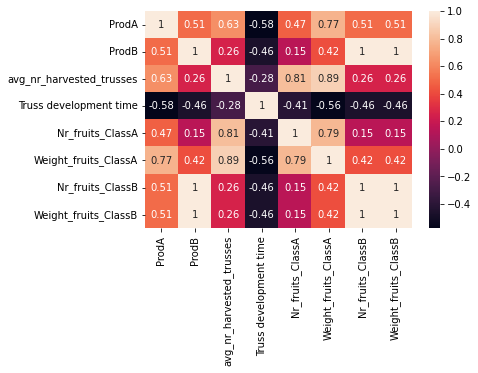

In [ ]:
sns.heatmap(aicu_prod.corr(), annot = True);

# 6.0 Resources

In [ ]:
aicu_res = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/Resources.csv')
aicu_res['datetime'] = pd.to_datetime(aicu_res['%Time '], unit='D', origin='1899-12-30')
aicu_res = aicu_res.drop(['%Time '], axis = 1)

#Removing blank spaces in name of columns, if any
aicu_res.columns = aicu_res.columns.str.strip()

aicu_res.head(4)

Heat_cons  ElecHigh  ElecLow  CO2_cons   Irr  Drain   datetime
0     2.8557  0.844750     0.00  0.005477  16.2    0.0 2019-12-16
1     1.1328  0.522667     0.00  0.005503   0.0    0.0 2019-12-17
2     1.1430  0.837000     0.00  0.011452   0.0    0.0 2019-12-18
3     0.1194  0.864000     0.54  0.019830   0.0    0.0 2019-12-19

## 6.1 Preprocessing

In [ ]:
aicu_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Heat_cons  166 non-null    float64       
 1   ElecHigh   166 non-null    float64       
 2   ElecLow    166 non-null    float64       
 3   CO2_cons   166 non-null    float64       
 4   Irr        166 non-null    float64       
 5   Drain      166 non-null    float64       
 6   datetime   166 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.2 KB


- No null values
- Continuous Columns are correctly identified as float and not object
- Checking for outliers

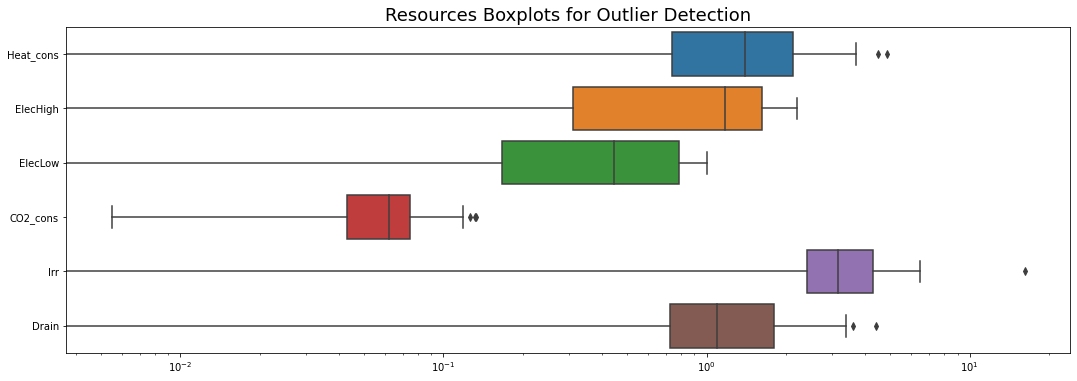

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (18,6))
ax =sns.boxplot(data = aicu_res, orient="h")
ax.set_title('Resources Boxplots for Outlier Detection', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [ ]:
aicu_res = aicu_res.set_index('datetime')

## 6.2 EDA

In [ ]:
#sns.pairplot(aicu_res);

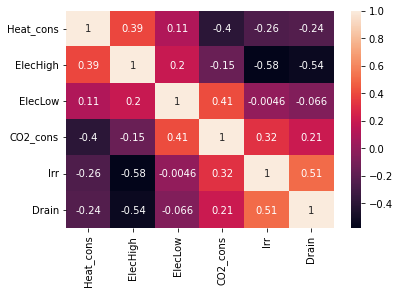

In [ ]:
sns.heatmap(aicu_res.corr(), annot = True);

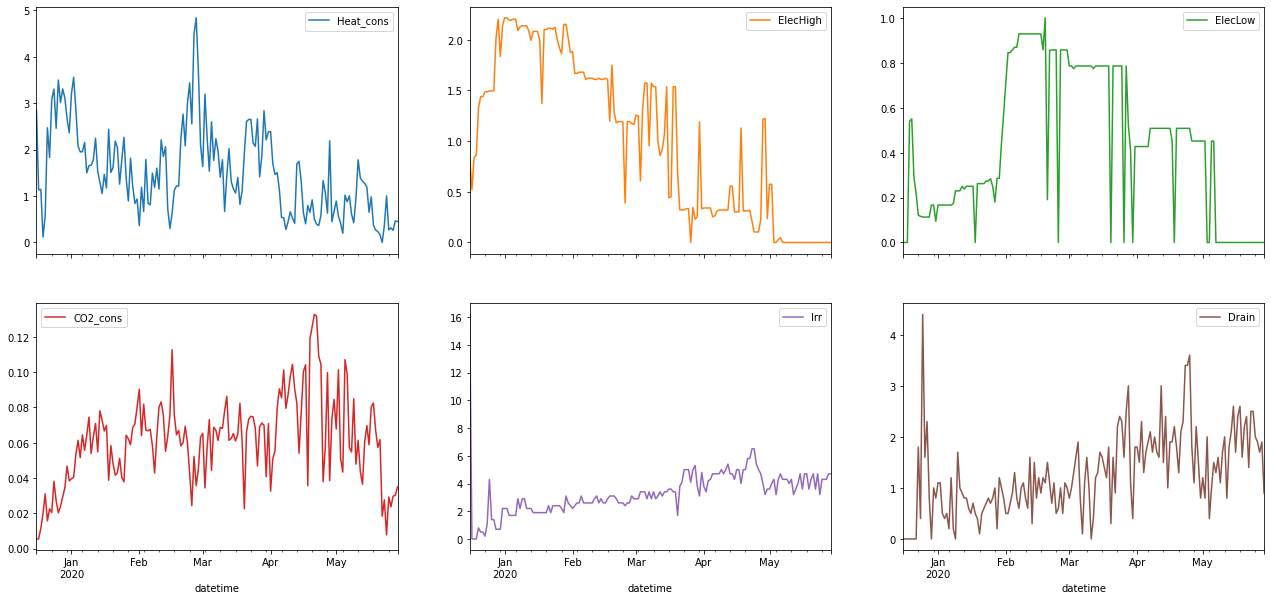

In [ ]:
aicu_res.plot(figsize = (22, 10), subplots=True, layout=(2, 3), );

- Resources like Heat consumption, Electricity (peak and off-peak hours), CO2 Consumption is reducing over the given period but the Water requirements for Irrigation as well as Drainage increasing.

# 7.0 Tomato Quality

In [ ]:
aicu_tomqual = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/TomQuality.csv')

#Removing blank spaces in name of columns, if any
aicu_tomqual.columns = aicu_tomqual.columns.str.strip()

aicu_tomqual['datetime'] = pd.to_datetime(aicu_tomqual['%time'], unit='D', origin='1899-12-30')
aicu_tomqual = aicu_tomqual.drop(['%time'], axis = 1)

aicu_tomqual

Flavour   TSS  Acid  %Juice  Bite  Weight DMC_fruit   datetime
0       80  9.00  14.5      67   219    9.00       NaN 2020-02-19
1       74  8.30  13.6      60   277   10.10       NaN 2020-03-04
2       71  8.30  12.1      53   285   11.40      8.73 2020-03-18
3       76  8.90  13.3      58   334   10.00      9.07 2020-04-01
4       73  8.90  12.5      51   290   11.00      8.71 2020-04-15
5       77  8.90  13.3      62   265   10.30      9.25 2020-04-29
6       79  9.13  12.1      64   188   11.13      8.88 2020-05-13
7       72  8.10  10.7      57   175   16.80      8.96 2020-05-29

## 7.1 Preprocessing

In [ ]:
aicu_tomqual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Flavour    8 non-null      int64         
 1   TSS        8 non-null      float64       
 2   Acid       8 non-null      float64       
 3   %Juice     8 non-null      int64         
 4   Bite       8 non-null      int64         
 5   Weight     8 non-null      float64       
 6   DMC_fruit  7 non-null      object        
 7   datetime   8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 640.0+ bytes


- missing value in DMC_fruit and is currently an object instead of float

In [ ]:
aicu_tomqual['DMC_fruit'] = aicu_tomqual['DMC_fruit'].astype('float')

In [ ]:
aicu_tomqual.isna().sum()

Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    2
datetime     0
dtype: int64

In [ ]:
aicu_tomqual['DMC_fruit'] = aicu_tomqual['DMC_fruit'].fillna(aicu_tomqual['DMC_fruit'].median())

## 7.1.1 Outlier detection

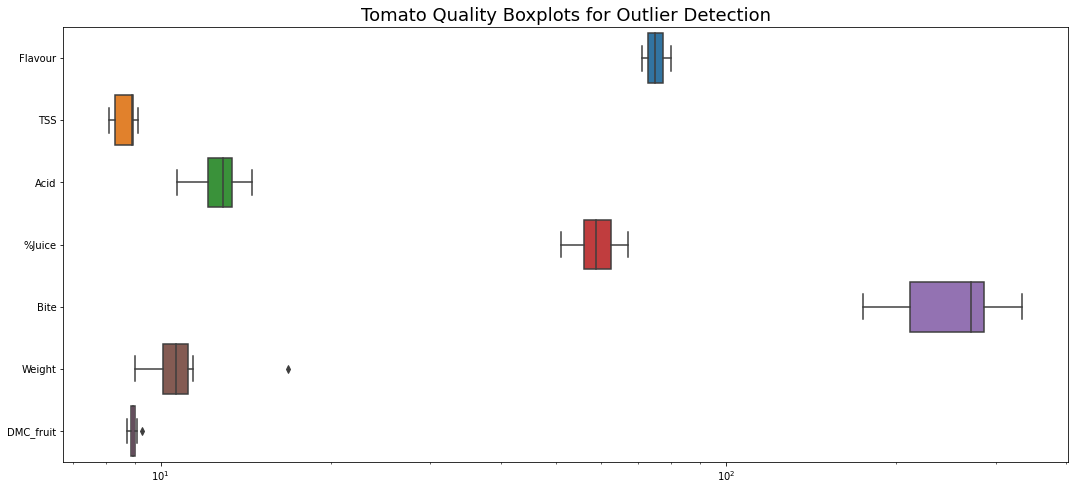

In [ ]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (18,8))
ax =sns.boxplot(data = aicu_tomqual, orient="h")
ax.set_title('Tomato Quality Boxplots for Outlier Detection', fontsize = 18)
ax.set(xscale="log")
plt.show()

- Replacing the outlier in "Weight" with median value

In [ ]:
aicu_tomqual.loc[aicu_tomqual['Weight']> 12, 'Weight'] = aicu_tomqual[aicu_tomqual['Weight']<12]['Weight'].median()

In [ ]:
aicu_tomqual = aicu_tomqual.set_index('datetime')

## 7.2 EDA

In [ ]:
#sns.pairplot(aicu_tomqual);

- Flavour is directly related to %Juice which is Percentage juice pressed from the fruit wall of the tomato
- Higher the weight lower is the acid content in Tomato

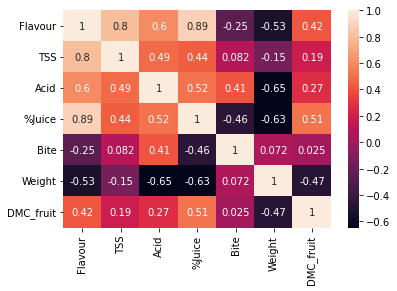

In [ ]:
sns.heatmap(aicu_tomqual.corr(), annot = True);

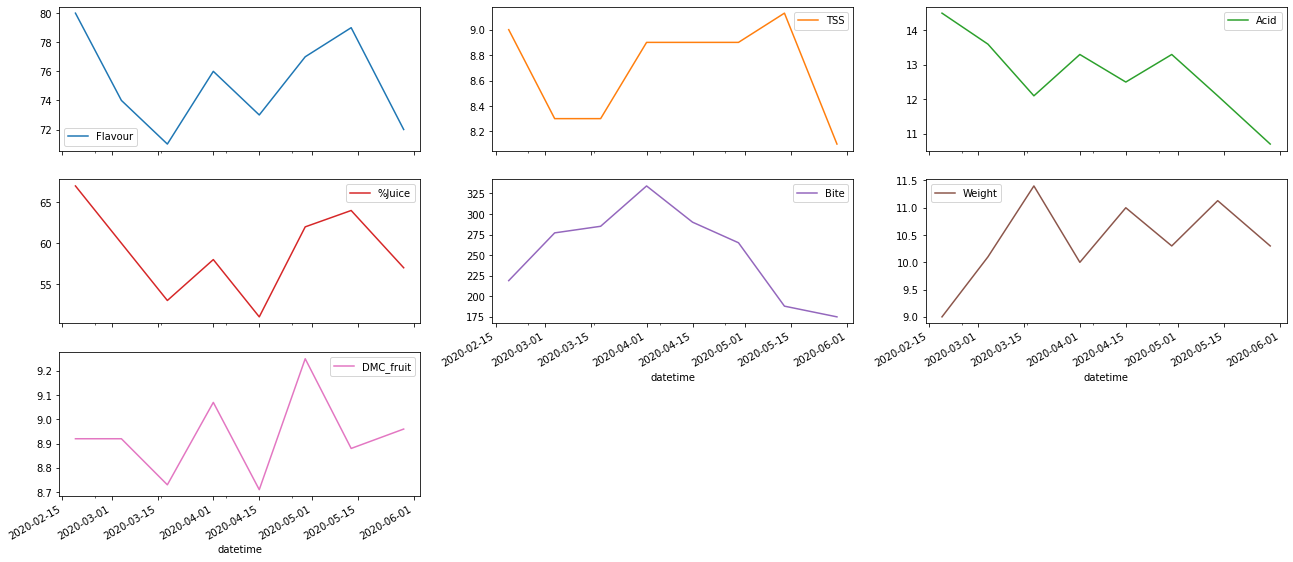

In [ ]:
aicu_tomqual.plot(figsize = (22, 10), subplots=True, layout=(3, 3), );

# 8.0 Weather

In [39]:
aicu_wea = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/Weather/Weather.csv')
aicu_wea['datetime'] = pd.to_datetime(aicu_wea['%time'], unit='D', origin='1899-12-30')
aicu_wea = aicu_wea.drop(['%time'], axis = 1)

#Removing Preceeding blank spaces in name of columns
aicu_wea.columns = aicu_wea.columns.str.strip()

aicu_wea.head()

AbsHumOut  Iglob  PARout  Pyrgeo  RadSum  Rain  Rhout  Tout  Winddir  \
0   6.220954    0.0     0.0   -72.0   215.0   0.0   80.6   6.9     32.0   
1   6.220954    0.0     0.0   -73.0     0.0   0.0   80.6   6.9     32.0   
2   6.205565    0.0     0.0   -76.0     0.0   0.0   80.4   6.9     32.0   
3   6.190173    0.0     0.0   -77.0     0.0   0.0   80.2   6.9     32.0   
4   6.162624    0.0     0.0   -75.0     0.0   0.0   80.9   6.7     32.0   

   Windsp                      datetime  
0     4.7 2019-12-16 00:00:00.000000000  
1     4.7 2019-12-16 00:04:59.808000256  
2     4.7 2019-12-16 00:09:59.616000000  
3     4.7 2019-12-16 00:15:00.288000000  
4     4.7 2019-12-16 00:20:00.096000256

## 8.1 Pre-Processing

In [40]:
aicu_wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   AbsHumOut  47738 non-null  float64       
 1   Iglob      47738 non-null  float64       
 2   PARout     47738 non-null  float64       
 3   Pyrgeo     47738 non-null  float64       
 4   RadSum     47738 non-null  float64       
 5   Rain       47738 non-null  float64       
 6   Rhout      47738 non-null  float64       
 7   Tout       47738 non-null  float64       
 8   Winddir    47738 non-null  float64       
 9   Windsp     47738 non-null  float64       
 10  datetime   47809 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 4.0 MB


In [41]:
aicu_wea.isna().sum()

AbsHumOut    71
Iglob        71
PARout       71
Pyrgeo       71
RadSum       71
Rain         71
Rhout        71
Tout         71
Winddir      71
Windsp       71
datetime      0
dtype: int64

In [42]:
aicu_wea = aicu_wea.dropna()

### 2.1.1 Outlier Detection

In [43]:
aicu_wea = aicu_wea.set_index('datetime')

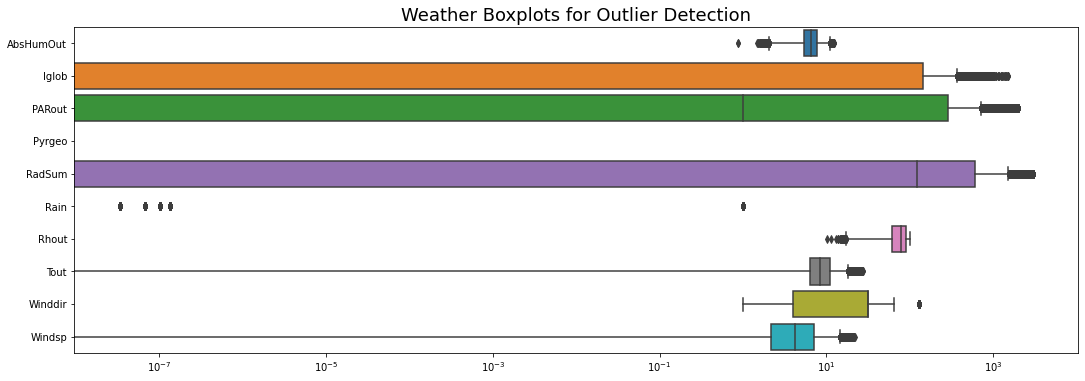

In [44]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (18,6))
ax =sns.boxplot(data = aicu_wea, orient="h")
ax.set_title('Weather Boxplots for Outlier Detection', fontsize = 18)
ax.set(xscale="log")
plt.show()

#### Rain should have only 1 & 0

In [45]:
aicu_wea['Rain'].value_counts()

0.000000e+00    44851
1.000000e+00     2151
6.710000e-08      103
9.999999e-01      103
9.999999e-01       98
1.340000e-07       93
3.350000e-08       91
1.010000e-07       90
9.999999e-01       81
1.000000e+00       77
Name: Rain, dtype: int64

In [46]:
#removing outliers from remaining columns and replacing with median i.e. 50th percentile
X_columns = aicu_wea.columns

for col in X_columns:
  if col != 'Rain':  
    q1, q2, q3 = np.percentile(aicu_wea[col], 25), np.percentile(aicu_wea[col], 50), np.percentile(aicu_wea[col], 75)
    IQR = q3 - q1
    upper_limit = q3 + (1.5 * IQR)
    lower_limit = q1 - (1.5 * IQR)
    aicu_wea.loc[aicu_wea[col]< lower_limit, col] = q2
    aicu_wea.loc[aicu_wea[col]> upper_limit, col] = q2  
  elif col == 'Rain':
    aicu_wea.loc[aicu_wea[col]> 0.9, col] = 1
    aicu_wea.loc[aicu_wea[col]< 0.9, col] = 0

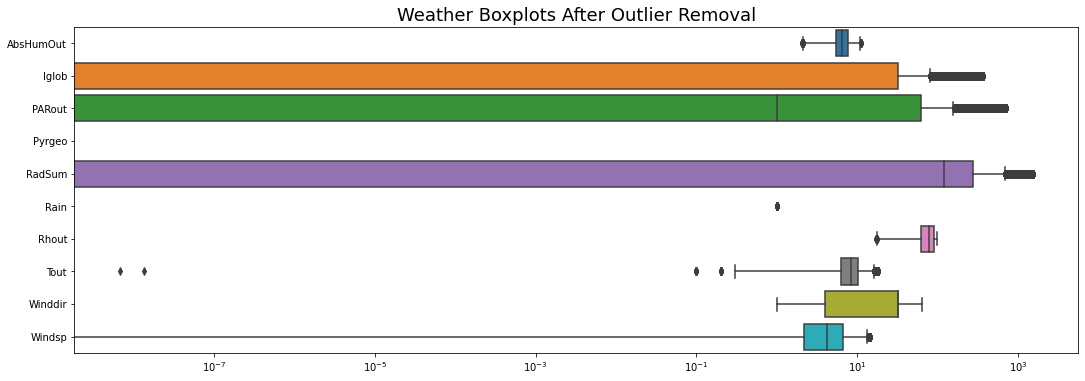

In [47]:
# Boxplot after Outlier removal

plt.figure(figsize = (18,6))
ax =sns.boxplot(data = aicu_wea, orient="h")
ax.set_title('Weather Boxplots After Outlier Removal', fontsize = 18)
ax.set(xscale="log")
plt.show()

## 2.2 EDA

### 2.2.1 Indoor climate, status of actuators and irrigation

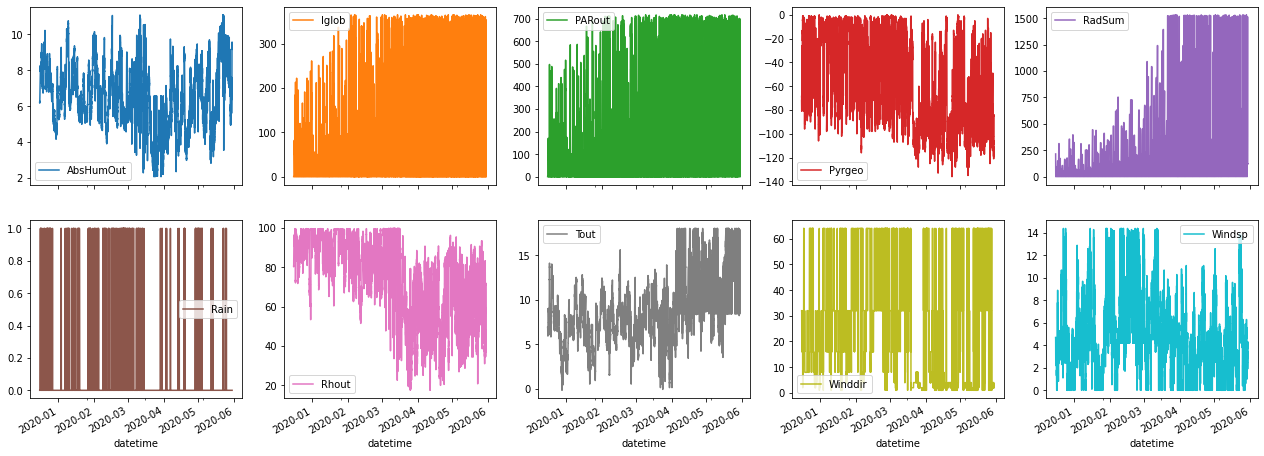

In [48]:
aicu_wea.plot(figsize = (22, 8), subplots=True, layout=(2, 5),);

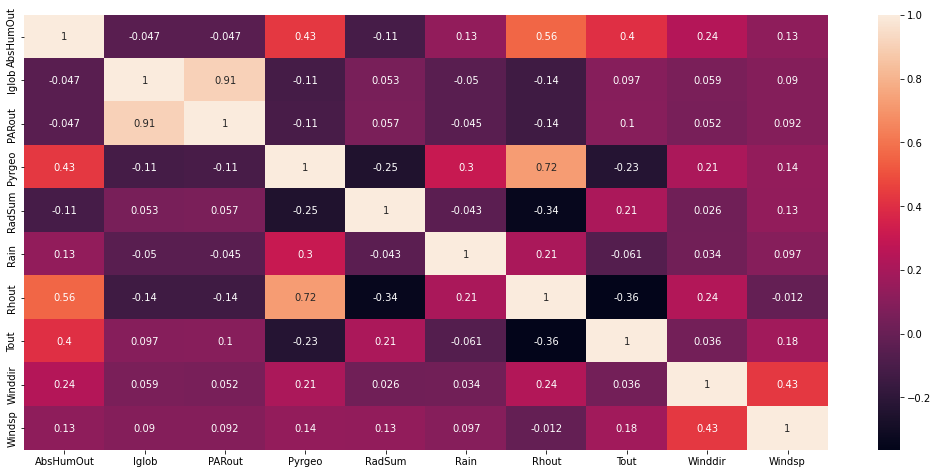

In [49]:
plt.figure(figsize = (18,8))
sns.heatmap(aicu_wea.corr(), annot = True, );